# Milestone P3

# Milestone Objectives

- Execute the project: single final notebook (main logic), helpers python file (implementations functions).

- Write a data story

- Update README: details the contributions of all group members.

[Milestone P3 briefing](https://epfl-ada.github.io/teaching/fall2023/cs401/projects/#p3-final-project-and-the-datastory)

In [2]:
import os

from helpers import *
# from implementations import *

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import nltk
nltk.download('punkt')
import re
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

%load_ext autoreload
%autoreload 2

c:\Users\paulr\anaconda3\envs\ada\lib\site-packages\pyspark\pandas\__init__.py:50: UserWarning: 'PYARROW_IGNORE_TIMEZONE' environment variable was not set. It is required to set this environment variable to '1' in both driver and executor sides if you use pyarrow>=2.0.0. pandas-on-Spark will set it for you but it does not work if there is a Spark context already launched.
  warnings.warn(
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\paulr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
%%capture
%run ./milestoneP2.ipynb

# Structure

## 0) Overview of the data used 

In [4]:
# INSERT USEFUL PARTS OF P2 HERE
movies = movies # this will be the variable to use in the P3 notebook: clean, filtered (US, years, ...) and with additionnal datasets merged

## 1) Finding Potential pivotal movies

In this section, we will first analyze trends in specific genres of movies, focusing on those that are more niche and specific, such as Science Fiction, Teen, and Biography. The objective is to uncover patterns and insights within these specialized genres, as opposed to broader categories like Action or Adventure. We need to be careful to not choosing genre that are too niche because the set of movie will be too small to be analysed. 

After obtaining the trends we could be able to identify, for each trend, a subset of movies that could have strat the trend (i.e. pivotal movies)

### a) Selection of niches genre

In [5]:
subsets = select_subsets(movies)
print('Number of subsets: {}'.format(len(subsets)))

Number of subsets: 244


### b) Trend graphs for some genres


Subset: Horror
	2571 | 28821 (size subset | movies)
	= 8.9206 %


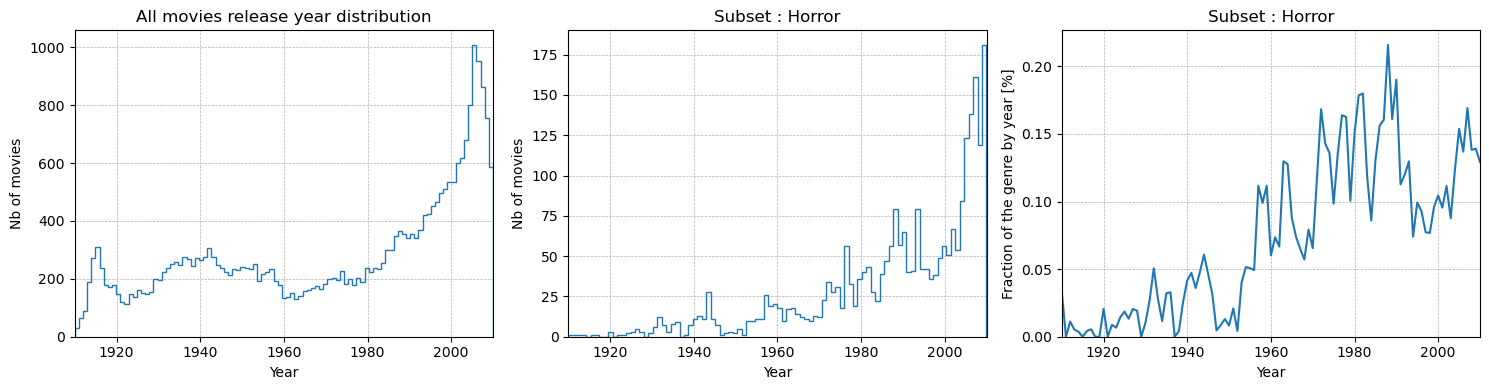

In [6]:
# VISUALIZE SUBSET i
i = find_subset(subsets, 'Horror')
viz_subset(i, subsets, movies)

### c) Trend automatic detection

In [7]:
QUALITY = 0.2
trends = get_trends(movies, subsets, QUALITY)

print('Nb of trends: {}'.format(len(trends)))
print('Trend detection for 5 first subsets:')
display(trends[:5])

Nb of trends: 244
Trend detection for 5 first subsets:


[('Absurdism', [1977, 1995], [1965, 1990]),
 ('Action', [1974], [1967]),
 ('Action Comedy', [], []),
 ('Action Thrillers', [1975, 1995], [1967, 1987]),
 ('Action/Adventure', [1973], [1966])]

======== Subset Animation ========
Peaks: 		  [1937, 1955, 2006]
Inflexion points: [1928, 1949, 1997]
Quality of peaks: [0.8944550792731196, 0.10797647002213683, 0.2703500979062737]


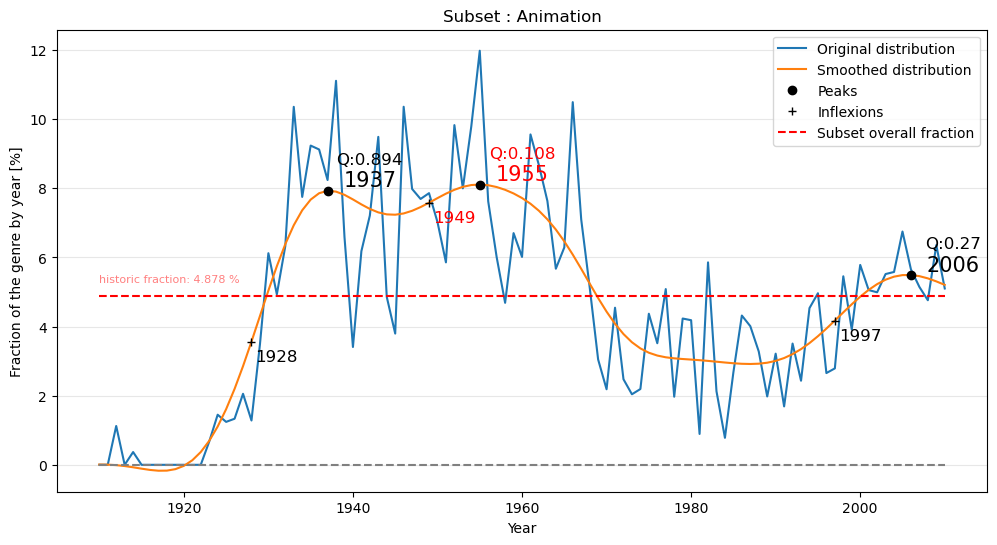

In [8]:
# Visualize trend detection for subset i
i = find_subset(subsets, 'Animation')

print('======== Subset {} ========'.format(subsets[i][0]))
print('Peaks: \t\t  {}'.format(get_peaks(movies, subsets, i)[0]))
print('Inflexion points: {}'.format(get_peaks(movies, subsets, i)[1]))
print('Quality of peaks: {}'.format(get_peaks(movies, subsets, i)[2]))

fig = viz_peaks(movies, subsets, i)

#### c.*) Save all trends visualizations as images

In [9]:
# Run this cell to download all trend plots (6min)
# get_all_viz(movies, subsets)

### d) Construction of potential pivotal movie sets 
 

In [10]:
candidates = get_candidates(subsets, trends)
print('Nb of sets of candidates: {}'.format(len(candidates)))

Nb of sets of candidates: 387


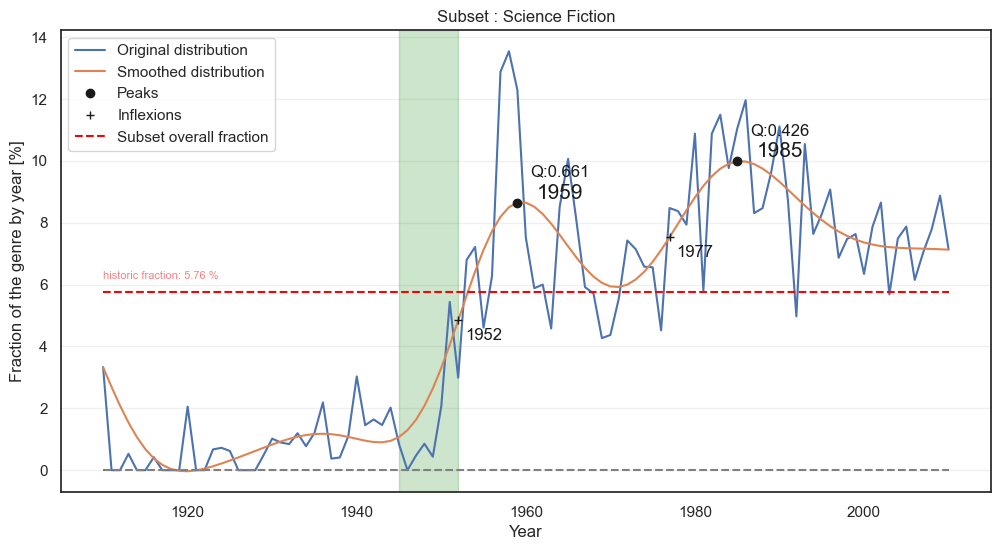

Candidates of pivotal of genre Science Fiction, for trend peak in 1959 and trend inflexion in 1952
Nb of candidates: 31


,id_wiki,id_freebase,name,year,revenue,runtime,lang,countries,genres
46748,8279491,/m/026ytcn,The Purple Monster Strikes,1945,NaN,NaN,[English Language],[USA],"[Science Fiction, Action, Adventure, Black-and..."
37427,14143898,/m/03cvyvb,The Monster and the Ape,1945,NaN,NaN,[English Language],[USA],"[Science Fiction, Sci-Fi Adventure, Adventure,..."
51709,11457604,/m/02rdfgc,Brick Bradford,1947,NaN,NaN,[English Language],[USA],"[Science Fiction, Action, Adventure, Black-and..."
13194,6680124,/m/0gg_ry,Haredevil Hare,1948,NaN,NaN,[English Language],[USA],"[Short Film, Science Fiction, Family Film, Com..."
32589,28387767,/m/0crgyyh,Unknown Island,1948,NaN,75.0,[English Language],[USA],"[Science Fiction, Action, Adventure]"
51987,8279688,/m/026ytsd,King of the Rocket Men,1949,NaN,NaN,[English Language],[USA],"[Science Fiction, Action, Adventure, Black-and..."
62038,879000,/m/03l3hv,Destination Moon,1950,NaN,92.0,[English Language],[USA],"[Science Fiction, Adventure]"
42860,8283082,/m/026yyxd,The Invisible Monster,1950,NaN,NaN,[English Language],[USA],"[Science Fiction, Action, Adventure, Black-and..."
27438,11129337,/m/02r0_q2,Two Lost Worlds,1950,NaN,61.0,[English Language],[USA],"[Action/Adventure, Science Fiction, Action, Fa..."
27882,2249633,/m/06z50f,The Flying Saucer,1950,NaN,69.0,[English Language],[USA],"[Science Fiction, Action, Adventure, Spy]"


In [64]:
show_candidates(movies, subsets, candidates, 'Science Fiction', peak='first')

## 2) Metric assessment for Pivotal Movies identification

Identifying the pivotal movie, or the one that starts a trend, involves a combination of qualitative and quantitative analysis. Here are considerations and steps to help define the chosen pivotal movie within a specific genre:

 - **Box-office Revenue :**
    Analyze the box-office performance of candidate movies within the subset. The pivotal movie often exhibits exceptional financial success, indicating a strong audience demand for the particular genre or theme. We need then to look for movies that surpassed industry expectations in terms of revenue. Also comparing the box-office performance of candidate movies to industry standards and consider their impact on subsequent films' budgeting and revenue expectations.

- **Reviews :**
   Critical reception is a key indicator of a movie's impact and lasting influence. The pivotal movie should have received positive reviews from both critics and audiences, showcasing its quality and appeal. To this aims we incorporate a new dataset that includes review. These review will be a measuremnent of how good a movie is . This metric is fundamental to identify the pivotal movie : if a film is considered as bad there is no chance that it influence the cinema industry and creating a trend.

- **Awards :**
Another measure for assessing influence is the recognition garnered through awards. Industry accolades serve as a validation of a movie's cultural and artistic significance. The receipt of awards signifies not only the excellence of the film but also its potential to set a standard worth emulating. It provides more precise insights into why the film is esteemed. Noteworthy awards include prestigious honors like the Oscars. In our analysis, we have opted to incorporate a dataset that encompasses these awards and their respective categories.

- **Plot Similarity:**
  This metric serves as an assessment of the extent to which a film influences others within the genre during trends. The concept is as follows: if the plot of a potential pivotal film closely resembles those observed in subsequent trend films when compared to other movies in the candidate subset, it indicates the film's influence on plot development. This similarity suggests that other films intentionally emulated the storyline, signifying the impactful nature of the pivotal film.



All these metrics will be exploited to select the pivotal film among the candidate subset. But to use it we need to properly define function which calculate from available data or simply add missing data from other dataset.


## Further cleaning and data gathering

In [12]:
# Start with the pre-merge df of Milestone 2:

display(movies.sample(5))
display(movies.shape)
display(movies.info())
generate_missing_info(movies)

,id_wiki,id_freebase,name,year,revenue,runtime,lang,countries,genres
20686,5511330,/m/0dq66g,Treat 'Em Rough,1942,NaN,61.0,[English Language],[USA],[Black-and-white]
57180,20503651,/m/04zx8rz,Journey for Survival,1981,NaN,15.0,[English Language],[USA],"[Short Film, Documentary]"
65578,10752538,/m/02qp1wz,William Eggleston in the Real World,2005,NaN,84.0,[English Language],[USA],"[Biographical film, Biography, Graphic & Appli..."
71237,2278569,/m/070bsb,BloodRayne,2005,3650275.0,95.0,[English Language],"[USA, Germany]","[Horror, Adventure, Gothic Film, Creature Film..."
70291,15749688,/m/03ns74v,A Very Serious Person,2006,NaN,96.0,[English Language],[USA],"[LGBT, Indie, Comedy-drama, Coming of age, Gay..."


(28821, 9)

<class 'pandas.core.frame.DataFrame'>
Index: 28821 entries, 0 to 74827
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id_wiki      28821 non-null  int64  
 1   id_freebase  28821 non-null  object 
 2   name         28821 non-null  object 
 3   year         28821 non-null  int32  
 4   revenue      6466 non-null   float64
 5   runtime      25712 non-null  float64
 6   lang         28821 non-null  object 
 7   countries    28821 non-null  object 
 8   genres       28821 non-null  object 
dtypes: float64(2), int32(1), int64(1), object(5)
memory usage: 2.1+ MB


None

,Missing Data (%)
Column,
id_wiki,0.00
id_freebase,0.00
name,0.00
year,0.00
revenue,77.56
runtime,10.79
lang,0.00
countries,0.00
genres,0.00


### Cleaning big IMDB dataset

In [13]:
# Loading big IMDb dataset
IMDB_PATH = '/imdb_ratings_all_time/movies_imdb.csv'

imdb_vanilla = pd.read_csv(DATA_PATH+IMDB_PATH, usecols=['id', 'name', 'year', 'rating', 'duration', 'votes', 'gross_income'], low_memory=False)

display(imdb_vanilla.sample(5))
display(imdb_vanilla.shape)
display(imdb_vanilla.info())
display(imdb_vanilla.isnull().sum())
display(imdb_vanilla[imdb_vanilla['gross_income']!='0'].sample(5))

,id,name,year,rating,duration,votes,gross_income
1992486,tt9023088,General Marsh,(2019– ),11.0,0 min,0,0
1551662,tt13964600,Kamen Rider Saber,(2020–2021),8.0,0 min,5,0
941975,tt9538400,Ride: Like a Daydream,(1990 Music Video),11.0,4 min,0,0
1775644,tt1536369,WWE Smackdown!,(1999– ),5.8,86 min,10,0
185608,tt12434832,Zekkyo,(2019),11.0,0 min,0,0


(2590932, 7)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2590932 entries, 0 to 2590931
Data columns (total 7 columns):
 #   Column        Dtype  
---  ------        -----  
 0   id            object 
 1   name          object 
 2   year          object 
 3   rating        float64
 4   duration      object 
 5   votes         object 
 6   gross_income  object 
dtypes: float64(1), object(6)
memory usage: 138.4+ MB


None

id              0
name            4
year            0
rating          0
duration        0
votes           0
gross_income    0
dtype: int64

,id,name,year,rating,duration,votes,gross_income
1285225,tt0049755,Showdown at Abilene,(1956),6.1,80 min,344,"5,895,238"
1004926,tt0430327,Madagascar,(2005 Video Game),6.8,0 min,617,"57,100"
1470622,tt1470021,Beautiful Wave,(2011),5.0,96 min,596,"876,900"
719724,tt0374926,Once Upon a Mattress,(1972 TV Movie),8.1,90 min,147,"2,500,000"
7113,tt0078323,Stingray,(1978),5.5,100 min,276,"16,337,355"


In [14]:
imdb = imdb_vanilla.copy(deep=True)

# Let's get rid of the missing movie names
imdb = imdb_vanilla.loc[~imdb_vanilla.name.isnull()]

# Cleaning the year column: removing some characters and extracting starting year only
imdb = imdb[~imdb['year'].astype(str).str.contains('-|–')]
imdb.loc[:, 'year'] = imdb['year'].str.extract(r'(\d+)', expand=False)
imdb['year'] = imdb['year'].replace('', np.nan)
imdb['year'] = pd.to_numeric(imdb['year'], errors='coerce')
imdb.loc[:, 'year'] = imdb['year'].astype('Int64', errors='ignore')

# Dataframe is huge, and we do not care about movies post-2017: let's reduce it a bit
imdb = imdb[imdb['year'] <= 2017].reset_index(drop=True)

# From gross income, remove undesired characters and turn to float:
imdb.loc[:, 'gross_income'] = imdb['gross_income'].apply(lambda x: clean_gross_income(x))
imdb['gross_income'] = pd.to_numeric(imdb['gross_income'], errors='coerce')
imdb.loc[:, 'gross_income'] = imdb['gross_income'].replace(0, np.nan)

# From votes, remove undesired characters and turn to float:
imdb.loc[:, 'votes'] = imdb['votes'].str.replace(',', '').astype(float)
imdb.loc[:, 'votes'] = imdb['votes'].replace(0, np.nan)
imdb.loc[pd.isna(imdb['votes']), 'rating'] = np.nan
imdb = imdb[imdb['rating'] <= 10]

# Extract number from duration:
imdb.loc[:, 'duration'] = imdb['duration'].str.extract(r'(\d+)', expand=False)
imdb.loc[:,'duration'] = imdb['duration'].astype(float)
imdb.loc[:, 'duration'] = imdb['duration'].replace(0, np.nan)
imdb['duration'] = pd.to_numeric(imdb['duration'], errors='coerce')  

# Year and duration are elements used to detect and fuse duplicates: need them clean
imdb = imdb.dropna(subset=['year', 'duration'])

# If both votes and gross_income are unknown, then the row is of no use
imdb = imdb.dropna(subset=['votes', 'gross_income'], how='all').reset_index(drop=True)

display(imdb[~(imdb['gross_income'].isna())!=0].sample(5))
display(imdb.shape)
display(imdb.info())
generate_missing_info(imdb)

,id,name,year,rating,duration,votes,gross_income
57007,tt0057259,The Long Ships,1964,6.0,126.0,2758.0,3021629.0
209446,tt2976920,Violette,2013,6.9,139.0,2103.0,347321.0
57513,tt0035616,Air Force,1943,7.0,124.0,3409.0,203781.0
161079,tt0433035,Real Steel,2011,7.0,127.0,323432.0,85468508.0
188074,tt0475735,Super,2005,5.0,151.0,690.0,259224.0


(214143, 7)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214143 entries, 0 to 214142
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            214143 non-null  object 
 1   name          214143 non-null  object 
 2   year          214143 non-null  Int64  
 3   rating        214143 non-null  float64
 4   duration      214143 non-null  float64
 5   votes         214143 non-null  object 
 6   gross_income  27935 non-null   float64
dtypes: Int64(1), float64(3), object(3)
memory usage: 11.6+ MB


None

,Missing Data (%)
Column,
id,0.00
name,0.00
year,0.00
rating,0.00
duration,0.00
votes,0.00
gross_income,86.95


In [15]:
# Are there any doublons ?
display(check_doublons(imdb, col_check=['name'], year='year', runtime='duration'))

# Example of a doublon 
display(imdb[(imdb['name']=='Unconditional') & (imdb['year']==2012)]) 

Rows with real duplicates: 
                              name  year  duration
3134                 Unconditional  2012      92.0
4210                   Blood Money  2012     109.0
12047   The Game Ain't 4 Everybody  2009     105.0
13546                      Misfits  2015      20.0
14199          Trouble in Paradise  1989     100.0
...                            ...   ...       ...
214138                   Game Face  2017      42.0
214139                   Game Face  2017      42.0
214140                   Game Face  2017      42.0
214141                   Game Face  2017      42.0
214142                   Game Face  2017      42.0

[10243 rows x 3 columns]
--------------------------------------------------------------------------------


None

,id,name,year,rating,duration,votes,gross_income
3134,tt1758610,Unconditional,2012,7.0,92.0,4800.0,1005800.0
199175,tt1967651,Unconditional,2012,6.5,92.0,741.0,NaN


In [16]:
# Need to fuse the duplicates
imdb_clean = imdb.copy(deep=True)

imdb_clean = fuse_duplicates_imdb(imdb_clean)
imdb_clean = calculate_weighted_average(imdb_clean, 'name', 'rating', 'votes')

# Merge successful ?
display(imdb_clean[(imdb_clean['name']=='Unconditional') & (imdb_clean['year']==2012)]) 
display(check_doublons(imdb_clean, col_check=['name'], year='year', runtime='duration'))
# Yes !

display(imdb_clean.sample(5))
display(imdb_clean.shape)
display(imdb_clean.info())

,id,name,year,rating,duration,votes,gross_income
3134,tt1758610,Unconditional,2012,6.9,92.0,5541.0,1005800.0


No duplicates
--------------------------------------------------------------------------------


None

,id,name,year,rating,duration,votes,gross_income
167823,tt0057701,The Yesterday Machine,1965,3.9,85.0,377.0,NaN
11247,tt1691926,Nice Guy,2012,6.4,89.0,112.0,NaN
187861,tt3321428,Torrente 5,2014,5.3,105.0,4181.0,NaN
87544,tt8512126,Yes: Love Will Find a Way,1987,6.8,5.0,14.0,NaN
117006,tt0151769,No Mutton fer Nuttin',1943,7.6,8.0,52.0,NaN


(205729, 7)

<class 'pandas.core.frame.DataFrame'>
Index: 205729 entries, 0 to 214136
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            205729 non-null  object 
 1   name          205729 non-null  object 
 2   year          205729 non-null  Int64  
 3   rating        205729 non-null  float64
 4   duration      205729 non-null  float64
 5   votes         205729 non-null  float64
 6   gross_income  27934 non-null   float64
dtypes: Int64(1), float64(4), object(2)
memory usage: 12.8+ MB


None

### Original name map

In [17]:
NAME_MAP_PATH = '/imdb_ratings_all_time/imdb_title_map.tsv'

name_map_vanilla = pd.read_csv(DATA_PATH+NAME_MAP_PATH, sep='\t', usecols=['tconst', 'primaryTitle', 'originalTitle', 'startYear', 'runtimeMinutes']).rename(columns={'originalTitle': 'name',
                                                                                                                                                        'startYear': 'year',
                                                                                                                                                        'runtimeMinutes': 'duration'})

display(name_map_vanilla.sample(5))
display(name_map_vanilla.shape)
display(name_map_vanilla.info())

,tconst,primaryTitle,name,year,duration
6938861,tt2874288,Episode dated 9 May 2013,Episode dated 9 May 2013,2013,\N
1031504,tt10115136,Thunder in Paradise CD-I,Thunder in Paradise CD-I,2019,12
777635,tt0803061,Red Dog,Red Dog,2011,92
3845477,tt15275908,Unbelievable Makeup,Unbelievable Makeup,2017,\N
2456042,tt1270852,Bust a Ritmo,Bust a Ritmo,2008,\N


(9387091, 5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9387091 entries, 0 to 9387090
Data columns (total 5 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   tconst        object
 1   primaryTitle  object
 2   name          object
 3   year          object
 4   duration      object
dtypes: object(5)
memory usage: 358.1+ MB


None

In [18]:
# This dataframe is the key to overcome the "Star Wars" problem
# (ie: nomenclature changes for same movie across dataframes)

display(name_map_vanilla[name_map_vanilla['name']=='Star Wars'].head(1))
display(imdb_clean[imdb_clean['name']=='Star Wars'])
display(movies[movies['name'].str.contains('Star Wars Episode VI: Return of the Jedi')])

,tconst,primaryTitle,name,year,duration
75141,tt0076759,Star Wars: Episode IV - A New Hope,Star Wars,1977,121


,id,name,year,rating,duration,votes,gross_income
147390,tt0076759,Star Wars,1977,8.6,121.0,1332366.0,322740140.0


,id_wiki,id_freebase,name,year,revenue,runtime,lang,countries,genres
14376,50744,/m/0ddjy,Star Wars Episode VI: Return of the Jedi,1983,475106177.0,135.0,[English Language],[USA],"[Science Fiction, Adventure, Space opera, Fant..."


In [19]:
# Extract duration in minutes
name_map_vanilla['duration'] = name_map_vanilla['duration'].str.extract('(\d+\.\d+|\d+)').astype(float)
# If there are non-numeric values, replace them with np.nan
name_map_vanilla['duration'] = name_map_vanilla['duration'].replace('', np.nan)

# Extract year
name_map_vanilla['year'] = name_map_vanilla['year'].str.extract('(\d+)').astype(float)
# If there are non-numeric values, replace them with np.nan
name_map_vanilla['year'] = name_map_vanilla['year'].replace('', np.nan)
name_map_vanilla.loc[:, 'year'] = name_map_vanilla['year'].astype('Int64', errors='ignore')

# Get rid of missing data in duration and year
name_map = name_map_vanilla.copy(deep=True)
name_map = name_map_vanilla.dropna(subset=['duration', 'year']).reset_index(drop=True)

display(name_map.sample(5))
display(name_map.info())
generate_missing_info(name_map)


,tconst,primaryTitle,name,year,duration
2088661,tt3822436,Episode #1.8,Episode #1.8,2014,54.0
1128317,tt14941306,Episode #13.172,Episode #13.172,2021,42.0
2475356,tt6470762,Mazinger Z: INFINITY,Mazinger Z: Infinity,2017,95.0
2085729,tt3805410,Avsnitt 17,Avsnitt 17,2009,15.0
808257,tt12082622,Hair - Goats and Horses,Hair - Goats and Horses,2007,25.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644199 entries, 0 to 2644198
Data columns (total 5 columns):
 #   Column        Dtype  
---  ------        -----  
 0   tconst        object 
 1   primaryTitle  object 
 2   name          object 
 3   year          Int64  
 4   duration      float64
dtypes: Int64(1), float64(1), object(3)
memory usage: 103.4+ MB


None

,Missing Data (%)
Column,
tconst,0.0
primaryTitle,0.0
name,0.0
year,0.0
duration,0.0


In [20]:
# Are there any doublons ?
display(check_doublons(name_map, col_check=['name'], year='year', runtime='duration'))

# If that's the case let's drop the doublons
name_map_clean = drop_duplicates(name_map, col_check=['name', 'year', 'duration'])

display(check_doublons(name_map_clean, col_check=['name'], year='year', runtime='duration'))
display(name_map_clean.info())

Rows with real duplicates: 
                           name  year  duration
103      The Kiss in the Tunnel  1899       1.0
1262      Bread Upon the Waters  1913      11.0
1334          The Doctor's Duty  1913      11.0
1385                 Flood Tide  1913      11.0
1480                  The Idler  1914      11.0
...                         ...   ...       ...
2644083           Episode #1.10  2017      55.0
2644084            Episode #1.3  2017      55.0
2644129                  Broken  2017       4.0
2644167               Avsnitt 3  2017      44.0
2644168               Avsnitt 4  2017      45.0

[178245 rows x 3 columns]
--------------------------------------------------------------------------------


None

No duplicates
--------------------------------------------------------------------------------


None

<class 'pandas.core.frame.DataFrame'>
Index: 2526746 entries, 0 to 2644198
Data columns (total 5 columns):
 #   Column        Dtype  
---  ------        -----  
 0   tconst        object 
 1   primaryTitle  object 
 2   name          object 
 3   year          Int64  
 4   duration      float64
dtypes: Int64(1), float64(1), object(3)
memory usage: 118.1+ MB


None

### IMDB MERGE

In [21]:
# Merging imdb_clean and name_map_clean to obtain the final IMDb dataframe
imdb_final = pd.merge(name_map_clean, imdb_clean, on=['name', 'year', 'duration'], how='right').drop(columns={'tconst', 'id'}).rename(columns={'primaryTitle': 'alt_name',
                                                                                                                                                'duration': 'runtime', 
                                                                                                                                                'gross_income': 'revenue'})

display(imdb_final.sample(5))
display(imdb_final.shape)
display(imdb_final.info())
generate_missing_info(imdb_final)

# The "Star Wars" problem is taken care of
display(imdb_final[imdb_final['name']=='Star Wars'])

,alt_name,name,year,runtime,rating,votes,revenue
199583,Bath Water,Bath Water,2005,9.0,4.0,43.0,NaN
93417,My Wife's Gone to the Country,My Wife's Gone to the Country,1931,6.0,4.6,24.0,NaN
151865,3 Girls and the Golden Cocoon,3 Girls and the Golden Cocoon,2005,100.0,7.5,26.0,NaN
117576,The Ludivico Treatment,The Ludivico Treatment,1999,2.0,6.1,14.0,NaN
85194,I Go Back Home: Jimmy Scott,I Go Back Home: Jimmy Scott,2016,96.0,8.2,36.0,NaN


(205729, 7)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205729 entries, 0 to 205728
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   alt_name  158007 non-null  object 
 1   name      205729 non-null  object 
 2   year      205729 non-null  Int64  
 3   runtime   205729 non-null  float64
 4   rating    205729 non-null  float64
 5   votes     205729 non-null  float64
 6   revenue   27934 non-null   float64
dtypes: Int64(1), float64(4), object(2)
memory usage: 11.2+ MB


None

,alt_name,name,year,runtime,rating,votes,revenue
141635,Star Wars: Episode IV - A New Hope,Star Wars,1977,121.0,8.6,1332366.0,322740140.0


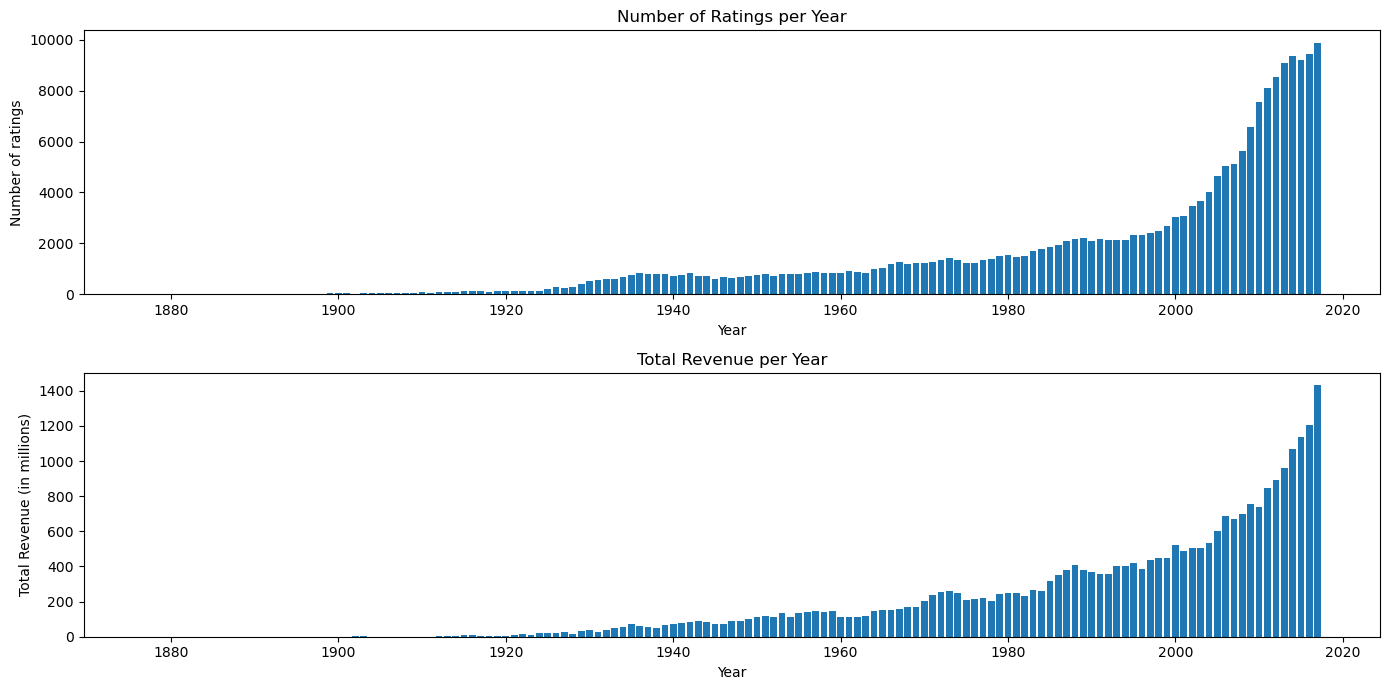

In [22]:
# Let's check the yearly distribution of ratings and revenues in the imdb_final dataframe
revenue_per_year_imdb = imdb_final.groupby('year')['revenue'].count().reset_index()
reviews_count_per_year_imdb = imdb_final.groupby('year')['rating'].count().reset_index()

fig = plt.figure(figsize=(14, 7))

# Plot for number of ratings per year
plt.subplot(2, 1, 1)  # 2 rows, 1 column, first subplot
plt.bar(reviews_count_per_year_imdb['year'], reviews_count_per_year_imdb['rating'])
plt.xlabel('Year')
plt.ylabel('Number of ratings')
plt.title('Number of Ratings per Year')

# Plot for revenue per year
plt.subplot(2, 1, 2)  # 2 rows, 1 column, second subplot
plt.bar(revenue_per_year_imdb['year'], revenue_per_year_imdb['revenue'])
plt.xlabel('Year')
plt.ylabel('Total Revenue (in millions)')
plt.title('Total Revenue per Year')

plt.tight_layout()
plt.show()

In [23]:
# To make it ready for future merges: clean the names to get rid of some characters and trailing white spaces
imdb_final['alt_name'] = imdb_final['alt_name'].apply(lambda x: str(x).replace('-', '').replace(':', ''))
imdb_final['alt_name'] = imdb_final['alt_name'].str.replace('\s+', ' ', regex=True).str.strip()
imdb_final['name'] = imdb_final['name'].apply(lambda x: str(x).replace('-', '').replace(':', ''))
imdb_final['name'] = imdb_final['name'].str.replace('\s+', ' ', regex=True).str.strip()

display(imdb_final[imdb_final['name']=='Star Wars'])

,alt_name,name,year,runtime,rating,votes,revenue
141635,Star Wars Episode IV A New Hope,Star Wars,1977,121.0,8.6,1332366.0,322740140.0


### IMDB_FINAL & MOVIELENS MERGE

In [24]:
# Loading the cleaned movie_lens dataframe from Milestone 2
movies_lens = movies_lens.rename(columns={'review': 'rating', 'nbr_review': 'votes'})

# To make it ready for future merges: clean the names to get rid of some characters and trailing white spaces

movies_lens['name'] = movies_lens['name'].apply(lambda x: str(x).replace('-', '').replace(':', ''))
movies_lens['name'] = movies_lens['name'].str.replace('\s+', ' ', regex=True).str.strip()

display(movies_lens.sample(5))
display(movies_lens.shape)
display(movies_lens.info())

,revenue,runtime,name,rating,votes,year
5423,187145.0,90.0,Complete Unknown,4.9,47.0,2016
2997,104478416.0,109.0,The Hitchhiker's Guide to the Galaxy,6.6,1340.0,2005
5529,32540674.0,95.0,Sleepless,5.8,345.0,2017
1109,448000000.0,88.0,Tarzan,7.1,1715.0,1999
3655,188072649.0,107.0,Tropic Thunder,6.5,1707.0,2008


(5619, 6)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5619 entries, 0 to 5618
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   revenue  5619 non-null   float64
 1   runtime  5619 non-null   float64
 2   name     5619 non-null   object 
 3   rating   5619 non-null   float64
 4   votes    5619 non-null   float64
 5   year     5619 non-null   int32  
dtypes: float64(4), int32(1), object(1)
memory usage: 241.6+ KB


None

In [25]:
# Merging imdb_final and movies_lens to complete annex data
annex = pd.merge(movies_lens, imdb_final, on=['name', 'year', 'runtime'], how='right')

display(annex.sample(5))
display(annex.shape)
display(annex.info())
generate_missing_info(annex)

,revenue_x,runtime,name,rating_x,votes_x,year,alt_name,rating_y,votes_y,revenue_y
166881,71485043.0,113.0,What Dreams May Come,6.8,596.0,1998,What Dreams May Come,6.9,108301.0,55485043.0
204700,NaN,67.0,Sin Dejar Rastro,NaN,NaN,2015,Sin Dejar Rastro,7.8,5.0,NaN
37490,NaN,63.0,G String Vampire,NaN,NaN,2005,G String Vampire,3.9,99.0,NaN
119669,NaN,5.0,Bat City,NaN,NaN,2002,Bat City,7.8,10.0,NaN
63730,NaN,14.0,Abraham,NaN,NaN,2010,Abraham,5.5,7.0,NaN


(205729, 10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205729 entries, 0 to 205728
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   revenue_x  3111 non-null    float64
 1   runtime    205729 non-null  float64
 2   name       205729 non-null  object 
 3   rating_x   3111 non-null    float64
 4   votes_x    3111 non-null    float64
 5   year       205729 non-null  Int64  
 6   alt_name   205729 non-null  object 
 7   rating_y   205729 non-null  float64
 8   votes_y    205729 non-null  float64
 9   revenue_y  27934 non-null   float64
dtypes: Int64(1), float64(7), object(2)
memory usage: 15.9+ MB


None

,Missing Data (%)
Column,
revenue_x,98.49
runtime,0.00
name,0.00
rating_x,98.49
votes_x,98.49
year,0.00
alt_name,0.00
rating_y,0.00
votes_y,0.00


In [26]:
annex_merge = annex.copy(deep=True)

# Fuse the revenue columns
annex_merge['revenue'] = annex_merge.apply(lambda row: fuse_columns_v2(row[f'revenue_x'], row[f'revenue_y']), axis=1)
annex_merge['revenue'] = pd.to_numeric(annex_merge['revenue'], errors='coerce')
annex_merge = annex_merge.drop(['revenue_x', 'revenue_y'], axis=1)

# Fuse the rating and votes columns
annex_merge = fuse_scores_v2(annex_merge, score_col1='rating_x', score_col2='rating_y', votes_col1='votes_x', votes_col2='votes_y', score_col='rating', votes_col='votes')

# Adressing alt_name nan issue
annex_merge['alt_name'] = annex_merge['alt_name'].replace('nan', None)
annex_merge['alt_name'].fillna(annex_merge['name'], inplace=True)

# Are there any doublons ?
display(check_doublons(annex_merge, ['alt_name'], 'year', 'runtime'))
display(check_doublons(annex_merge, ['name'], 'year', 'runtime'))

# If so let's fuse them to create a merge ready annex:
annex_merge = fuse_duplicates_v2(df=annex_merge, col_check=['name', 'alt_name'], year='year', runtime='runtime', col_null=['revenue'], col_score='rating', col_weight='votes')

display(check_doublons(annex_merge, ['alt_name'], 'year', 'runtime'))
display(check_doublons(annex_merge, ['name'], 'year', 'runtime'))

display(annex_merge.sample(5))
display(annex_merge.shape)
display(annex_merge.info())

Rows with real duplicates: 
                          alt_name  year  runtime
410                  The Defenders  2017     50.0
611                       The Firm  2012     60.0
703           Strong Girl Bongsoon  2017     67.0
778                       Paranoid  2016     45.0
787                American Gothic  2016     40.0
...                            ...   ...      ...
205569                       Lucan  2013     63.0
205577        The Putin Interviews  2017     58.0
205720       Expedition Impossible  2011     60.0
205722  The Voice Kids (Australia)  2014     90.0
205725      MythBusters The Search  2017     42.0

[890 rows x 3 columns]
--------------------------------------------------------------------------------


None

Rows with real duplicates: 
                              name  year  runtime
410                  The Defenders  2017     50.0
611                       The Firm  2012     60.0
703           Strong Girl Bongsoon  2017     67.0
778                       Paranoid  2016     45.0
787                American Gothic  2016     40.0
...                            ...   ...      ...
205569                       Lucan  2013     63.0
205577        The Putin Interviews  2017     58.0
205720       Expedition Impossible  2011     60.0
205722  The Voice Kids (Australia)  2014     90.0
205725      MythBusters The Search  2017     42.0

[910 rows x 3 columns]
--------------------------------------------------------------------------------


None

Fusing duplicates: 
Duplicates fused successfully.
--------------------------------------------------------------------------------
Fusing duplicates: 
Duplicates fused successfully.
--------------------------------------------------------------------------------
No duplicates
--------------------------------------------------------------------------------


None

No duplicates
--------------------------------------------------------------------------------


None

,runtime,name,year,alt_name,revenue,rating,votes
64602,51.0,Who Owns Water,2014,Who Owns Water,NaN,8.4,11.0
111454,6.0,Down with Cats,1943,Down with Cats,NaN,7.0,56.0
140054,44.0,Contact 2014,2014,Contact 2014,NaN,4.9,17.0
197862,90.0,Visual Purple,2007,Visual Purple,NaN,6.6,9.0
20256,60.0,The Exquisite Thief,1919,The Exquisite Thief,NaN,5.6,27.0


(205269, 7)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205269 entries, 0 to 205268
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   runtime   205269 non-null  float64
 1   name      205269 non-null  object 
 2   year      205269 non-null  Int64  
 3   alt_name  205269 non-null  object 
 4   revenue   27972 non-null   float64
 5   rating    205269 non-null  float64
 6   votes     205269 non-null  float64
dtypes: Int64(1), float64(4), object(2)
memory usage: 11.2+ MB


None

### ANNEX_MERGE & MOVIES_MERGE MERGE

In [27]:
# To make movies ready for future merges: clean the names to get rid of some characters and trailing white spaces
movies_merge = movies.copy(deep=True).reset_index(drop=True)
movies_merge['name'] = movies_merge['name'].apply(lambda x: str(x).replace('-', '').replace(':', ''))
movies_merge['name'] = movies_merge['name'].str.replace('\s+', ' ', regex=True).str.strip()

display(movies_merge.sample(5))
display(movies_merge.shape)
display(movies_merge.info())
generate_missing_info(movies_merge)

,id_wiki,id_freebase,name,year,revenue,runtime,lang,countries,genres
16645,33346429,/m/09pgkkk,The Big Hangover,1950,NaN,82.0,[English Language],[USA],"[Romantic comedy, Romance Film, Screwball come..."
25548,19375225,/m/04n34h1,Shiver My Timbers,1931,NaN,20.0,[English Language],[USA],"[Short Film, Family Film, Comedy, Black-and-wh..."
23594,13581120,/m/03cb0qb,The Amazing Panda Adventure,1995,7506759.0,84.0,"[Japanese Language, English Language]",[USA],"[Adventure, Children's/Family, Animal Picture,..."
26122,35418263,/m/063k92_,Get Happy,2008,NaN,25.0,[English Language],[USA],"[Short Film, Music, Biographical film, Documen..."
1199,23318059,/m/0660qyl,Helena from the wedding,2010,NaN,89.0,[English Language],[USA],"[Ensemble Film, Indie, Marriage Drama, Drama, ..."


(28821, 9)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28821 entries, 0 to 28820
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id_wiki      28821 non-null  int64  
 1   id_freebase  28821 non-null  object 
 2   name         28821 non-null  object 
 3   year         28821 non-null  int32  
 4   revenue      6466 non-null   float64
 5   runtime      25712 non-null  float64
 6   lang         28821 non-null  object 
 7   countries    28821 non-null  object 
 8   genres       28821 non-null  object 
dtypes: float64(2), int32(1), int64(1), object(5)
memory usage: 1.9+ MB


None

,Missing Data (%)
Column,
id_wiki,0.00
id_freebase,0.00
name,0.00
year,0.00
revenue,77.56
runtime,10.79
lang,0.00
countries,0.00
genres,0.00


In [28]:
# Let's complete movies_merge with data from annex_merge
movies3_vanilla = pd.merge(annex_merge, movies_merge, left_on=['alt_name', 'year'], right_on=['name', 'year'], how='right')

display(movies3_vanilla.sample(5))
display(movies3_vanilla.shape)
display(movies3_vanilla.info())

,runtime_x,name_x,year,alt_name,revenue_x,rating,votes,id_wiki,id_freebase,name_y,revenue_y,runtime_y,lang,countries,genres
17978,NaN,NaN,1914,NaN,NaN,NaN,NaN,12855272,/m/02x7vvr,The Green Alarm,NaN,NaN,[English Language],[USA],"[Short Film, Silent film, Indie, Black-and-whi..."
9429,NaN,NaN,1935,NaN,NaN,NaN,NaN,3992212,/m/0bbgly,Mutiny on the Bounty,4460000.0,132.0,[English Language],[USA],"[Action/Adventure, Action, Drama, Black-and-wh..."
16302,113.0,Remember the Titans,2000,Remember the Titans,126180717.0,7.8,213492.0,397574,/m/023gxx,Remember the Titans,136706683.0,119.0,[English Language],[USA],"[Sports, Americana, Biography, Drama, Inspirat..."
3722,116.0,Crimson Tide,1995,Crimson Tide,124393597.5,7.3,112474.0,1317604,/m/04sg0b,Crimson Tide,157387195.0,123.0,[English Language],[USA],"[Thriller, Action Thrillers, Action/Adventure,..."
18514,NaN,NaN,2006,NaN,NaN,NaN,NaN,13413688,/m/03c4jyy,Everything's Cool,NaN,89.0,[English Language],[USA],"[Culture & Society, Environmental Science, Ind..."


(29051, 15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29051 entries, 0 to 29050
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   runtime_x    14650 non-null  float64
 1   name_x       14650 non-null  object 
 2   year         29051 non-null  Int64  
 3   alt_name     14650 non-null  object 
 4   revenue_x    7947 non-null   float64
 5   rating       14650 non-null  float64
 6   votes        14650 non-null  float64
 7   id_wiki      29051 non-null  int64  
 8   id_freebase  29051 non-null  object 
 9   name_y       29051 non-null  object 
 10  revenue_y    6527 non-null   float64
 11  runtime_y    25936 non-null  float64
 12  lang         29051 non-null  object 
 13  countries    29051 non-null  object 
 14  genres       29051 non-null  object 
dtypes: Int64(1), float64(6), int64(1), object(7)
memory usage: 3.4+ MB


None

In [29]:
# Need to clean merged dataframe
movies3 = movies3_vanilla.copy(deep=True)

# For some reason, annex revenue tends to underestimate movies3 revenue
valid_rows = movies3_vanilla.dropna(subset=['revenue_x', 'revenue_y'])
percentage_higher = (valid_rows['revenue_x'] > valid_rows['revenue_y']).mean() * 100
percentage_lower = (valid_rows['revenue_x'] < valid_rows['revenue_y']).mean() * 100
percentage_equal = (valid_rows['revenue_x'] == valid_rows['revenue_y']).mean() * 100

print(f"The percentage of times 'revenue_x' is higher than 'revenue_y' when both are not NaN is: {percentage_higher:.2f}%") 
print(f"The percentage of times 'revenue_x' is lower than 'revenue_y' when both are not NaN is: {percentage_lower:.2f}%") 
print(f"The percentage of times 'revenue_x' is equal to 'revenue_y' when both are not NaN is: {percentage_equal:.2f}%") 

# Let's scale underestimated revenues
scaling_factor = (movies3[movies3['revenue_x'] < movies3['revenue_y']]['revenue_y'] / 
                  movies3[movies3['revenue_x'] < movies3['revenue_y']]['revenue_x']).median()
print('The scaling factor is: ', scaling_factor)

movies3.loc[movies3['revenue_x'] < movies3['revenue_y'], 'revenue_x'] = (
    movies3[movies3['revenue_x'] < movies3['revenue_y']]['revenue_x'] * scaling_factor
).apply('{:e}'.format)
movies3['revenue_x'] = pd.to_numeric(movies3['revenue_x'], errors='coerce')

display(movies3.info())

The percentage of times 'revenue_x' is higher than 'revenue_y' when both are not NaN is: 12.93%
The percentage of times 'revenue_x' is lower than 'revenue_y' when both are not NaN is: 62.20%
The percentage of times 'revenue_x' is equal to 'revenue_y' when both are not NaN is: 24.87%
The scaling factor is:  1.351464995146241
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29051 entries, 0 to 29050
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   runtime_x    14650 non-null  float64
 1   name_x       14650 non-null  object 
 2   year         29051 non-null  Int64  
 3   alt_name     14650 non-null  object 
 4   revenue_x    7947 non-null   float64
 5   rating       14650 non-null  float64
 6   votes        14650 non-null  float64
 7   id_wiki      29051 non-null  int64  
 8   id_freebase  29051 non-null  object 
 9   name_y       29051 non-null  object 
 10  revenue_y    6527 non-null   float64
 11  runtime_y    2

C:\Users\paulr\AppData\Local\Temp\ipykernel_21044\21779629.py:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['1.516711e+07' '3.100670e+06' '3.927101e+07' ... '3.407814e+05'
 '1.549602e+07' '4.974696e+08']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  movies3.loc[movies3['revenue_x'] < movies3['revenue_y'], 'revenue_x'] = (


None

In [30]:
#Let's fuse revenues
movies3['revenue'] = movies3.apply(lambda row: fuse_columns_v2(row[f'revenue_x'], row[f'revenue_y']), axis=1)
movies3 = movies3.drop(columns=['runtime_x', 'alt_name', 'revenue_x', 'revenue_y'])
movies3 = movies3.rename(columns={'runtime_y': 'runtime', 'name_x': 'alt_name', 'name_y': 'name'})

# Complete missing alt_name
movies3['alt_name'] = movies3['alt_name'].replace('nan', None)
movies3['alt_name'].fillna(movies3['name'], inplace=True)

display(movies3.sample(5))
display(movies3.info())

,alt_name,year,rating,votes,id_wiki,id_freebase,name,runtime,lang,countries,genres,revenue
15379,The Company of Wolves,1984,6.6,16405.0,1495709,/m/055wd4,The Company of Wolves,95.0,[English Language],"[USA, England, United Kingdom]","[Cult, Fantasy, Horror, Fairy tale, Creature F...",4389334.0
10332,Heaven Can Wait,1978,6.9,21183.0,103018,/m/0p_rk,Heaven Can Wait,101.0,[English Language],[USA],"[Romantic comedy, Remake, Sports, Fantasy, Com...",81640278.0
5647,Jonathan Livingston Seagull,1973,NaN,NaN,16091743,/m/04j2_y3,Jonathan Livingston Seagull,99.0,[English Language],[USA],"[Family Film, Family Drama, Drama, Film adapta...",1600000.0
26929,Mixed and Fixed,1915,NaN,NaN,12943556,/m/02z0w7m,Mixed and Fixed,NaN,[English Language],[USA],"[Short Film, Silent film, Indie, Black-and-whi...",<NA>
7680,Coming Home,1978,7.3,13574.0,103011,/m/0p_qr,Coming Home,126.0,[English Language],[USA],"[Drama, War film, Romantic drama, Romance Film...",32653905.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29051 entries, 0 to 29050
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   alt_name     29051 non-null  object 
 1   year         29051 non-null  Int64  
 2   rating       14650 non-null  float64
 3   votes        14650 non-null  float64
 4   id_wiki      29051 non-null  int64  
 5   id_freebase  29051 non-null  object 
 6   name         29051 non-null  object 
 7   runtime      25936 non-null  float64
 8   lang         29051 non-null  object 
 9   countries    29051 non-null  object 
 10  genres       29051 non-null  object 
 11  revenue      10731 non-null  object 
dtypes: Int64(1), float64(3), int64(1), object(7)
memory usage: 2.7+ MB


None

### Completing MOVIES3 with MOVIESTATS

In [31]:
# Some renowned movies are still missing, so let's incorporate movies_stats dataframe
movies_stats = movies_stats.rename(columns={'review': 'rating', 'nbr_review': 'votes'})
movies_stats['name'] = movies_stats['name'].apply(lambda x: str(x).replace('-', '').replace(':', ''))
movies_stats['name'] = movies_stats['name'].str.replace('\s+', ' ', regex=True).str.strip()

display(movies_stats.sample(5))
display(movies_stats.shape)
display(movies_stats.info())

,name,year,rating,votes,countries,revenue,runtime
6006,Sanctum,2011,5.9,54000.0,United States,108609310.0,108.0
5238,The Jane Austen Book Club,2007,6.8,27000.0,United States,7163566.0,106.0
7455,Fast & Furious Presents Hobbs & Shaw,2019,6.4,184000.0,United States,759056935.0,137.0
1131,North Shore,1987,6.5,2500.0,United States,3832228.0,96.0
4682,Munich,2005,7.5,216000.0,United States,130982129.0,164.0


(5377, 7)

<class 'pandas.core.frame.DataFrame'>
Index: 5377 entries, 1 to 7659
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       5377 non-null   object 
 1   year       5377 non-null   int64  
 2   rating     5377 non-null   float64
 3   votes      5377 non-null   float64
 4   countries  5377 non-null   object 
 5   revenue    5377 non-null   float64
 6   runtime    5376 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 336.1+ KB


None

In [32]:
# Completing movies3 with movies_stats to obtain movies3_stats
movies3_stats = pd.merge(movies_stats, movies3, on=['name', 'year'], how='right')

display(movies3_stats.sample(5))
display(movies3_stats.shape)
display(movies3_stats.info())

,name,year,rating_x,votes_x,countries_x,revenue_x,runtime_x,alt_name,rating_y,votes_y,id_wiki,id_freebase,runtime_y,lang,countries_y,genres,revenue_y
28064,CatTails for Two,1953,NaN,NaN,NaN,NaN,NaN,CatTails for Two,7.0,345.0,3561534,/m/09lpfc,NaN,[English Language],[USA],"[Short Film, Family Film, Comedy, Animation]",<NA>
8228,The Hollow,2004,NaN,NaN,NaN,NaN,NaN,The Hollow,4.4,2074.0,7094440,/m/0h3w3x,83.0,[English Language],[USA],[Horror],<NA>
344,Devour,2005,NaN,NaN,NaN,NaN,NaN,Devour,4.7,5053.0,5150761,/m/0d539d,90.0,[English Language],[USA],"[Sci-Fi Horror, Horror, Psychological thriller]",<NA>
14546,The 30 Foot Bride of Candy Rock,1959,NaN,NaN,NaN,NaN,NaN,The 30 Foot Bride of Candy Rock,5.4,822.0,8379031,/m/0271cq3,75.0,[English Language],[USA],"[Parody, Family Film, Science Fiction, Black-a...",<NA>
18575,Blood Brothers,1996,NaN,NaN,NaN,NaN,NaN,Blood Brothers,NaN,NaN,8672737,/m/027df_9,90.0,[English Language],[USA],[Documentary],<NA>


(29051, 17)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29051 entries, 0 to 29050
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         29051 non-null  object 
 1   year         29051 non-null  Int64  
 2   rating_x     3829 non-null   float64
 3   votes_x      3829 non-null   float64
 4   countries_x  3829 non-null   object 
 5   revenue_x    3829 non-null   float64
 6   runtime_x    3829 non-null   float64
 7   alt_name     29051 non-null  object 
 8   rating_y     14650 non-null  float64
 9   votes_y      14650 non-null  float64
 10  id_wiki      29051 non-null  int64  
 11  id_freebase  29051 non-null  object 
 12  runtime_y    25936 non-null  float64
 13  lang         29051 non-null  object 
 14  countries_y  29051 non-null  object 
 15  genres       29051 non-null  object 
 16  revenue_y    10731 non-null  object 
dtypes: Int64(1), float64(7), int64(1), object(8)
memory usage: 3.8+ MB


None

In [33]:
# Before fusing them, need to compare revenue_x and revenue_y
valid_rows = movies3_stats.dropna(subset=['revenue_x', 'revenue_y'])
percentage_higher = (valid_rows['revenue_x'] > valid_rows['revenue_y']).mean() * 100
percentage_lower = (valid_rows['revenue_x'] < valid_rows['revenue_y']).mean() * 100
percentage_equal = (valid_rows['revenue_x'] == valid_rows['revenue_y']).mean() * 100

print(f"The percentage of times 'revenue_x' is higher than 'revenue_y' when both are not NaN is: {percentage_higher:.2f}%") 
print(f"The percentage of times 'revenue_x' is lower than 'revenue_y' when both are not NaN is: {percentage_lower:.2f}%") 
print(f"The percentage of times 'revenue_x' is equal to 'revenue_y' when both are not NaN is: {percentage_equal:.2f}%") 
# Moviestats is more evenly distributed so no scaling factor needed 

# Since moviestats source is IMDB too, we don't want to double count the votes: use fuse_scores_stats
movies3_stats = fuse_scores_stats(df=movies3_stats, score_col1='rating_x', score_col2='rating_y', votes_col1='votes_x', votes_col2='votes_y')
movies3_stats['revenue'] = movies3_stats.apply(lambda row: fuse_columns(x=row['revenue_x'], y=row['revenue_y'], column_name='') if pd.isna(row['revenue_y']) 
                                                     else row['revenue_y'], axis=1)

movies3_stats = movies3_stats.drop(columns=['revenue_x', 'revenue_y', 'rating_x','votes_x', 'countries_x', 'runtime_x'])
movies3_stats = movies3_stats.rename(columns={'runtime_y': 'runtime', 'rating_y': 'rating', 'votes_y': 'votes', 'countries_y': 'countries'})

display(movies3_stats.info())

The percentage of times 'revenue_x' is higher than 'revenue_y' when both are not NaN is: 32.94%
The percentage of times 'revenue_x' is lower than 'revenue_y' when both are not NaN is: 28.60%
The percentage of times 'revenue_x' is equal to 'revenue_y' when both are not NaN is: 38.46%
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29051 entries, 0 to 29050
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         29051 non-null  object 
 1   year         29051 non-null  Int64  
 2   alt_name     29051 non-null  object 
 3   rating       15816 non-null  float64
 4   votes        15816 non-null  float64
 5   id_wiki      29051 non-null  int64  
 6   id_freebase  29051 non-null  object 
 7   runtime      25936 non-null  float64
 8   lang         29051 non-null  object 
 9   countries    29051 non-null  object 
 10  genres       29051 non-null  object 
 11  revenue      10920 non-null  object 
dtypes: Int64(1), f

None

In [34]:
# Keep only rows where revenue & votes are available
movies3_stats_clean = movies3_stats.copy(deep=True)

mask = (movies3_stats_clean['revenue'].isna()) | (movies3_stats_clean['votes'].isna())

movies3_stats_clean = movies3_stats_clean[~mask]

display(movies3_stats_clean.sample(5))
display(movies3_stats_clean.info())

,name,year,alt_name,rating,votes,id_wiki,id_freebase,runtime,lang,countries,genres,revenue
6006,Gable and Lombard,1976,Gable and Lombard,5.1,601.0,14988233,/m/03h3wdb,131.0,[English Language],[USA],"[Biography, Drama, Biopic [feature], Romantic ...",19161363.0
11515,The Molly Maguires,1970,The Molly Maguires,6.8,3941.0,3565365,/m/09lxn7,124.0,[English Language],[USA],"[Crime Fiction, Period piece, Drama, Docudrama]",1916249.0
23966,A Simple Plan,1998,A Simple Plan,7.5,69624.0,6233638,/m/0fy34l,121.0,[English Language],"[France, USA, Japan, United Kingdom, Germany]","[Thriller, Crime Fiction, Japanese Movies, Cri...",16311763.0
24337,Flying Leathernecks,1951,Flying Leathernecks,6.3,5035.0,3792817,/m/0b07zv,102.0,[English Language],[USA],"[Action/Adventure, Action, Drama, War film]",12706250.0
25416,Psycho IV The Beginning,1990,Psycho IV The Beginning,5.4,8517.0,2011090,/m/06dw_r,95.0,[English Language],[USA],"[Thriller, Crime Fiction, Horror, Supernatural...",15716828.0


<class 'pandas.core.frame.DataFrame'>
Index: 9496 entries, 0 to 29046
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         9496 non-null   object 
 1   year         9496 non-null   Int64  
 2   alt_name     9496 non-null   object 
 3   rating       9496 non-null   float64
 4   votes        9496 non-null   float64
 5   id_wiki      9496 non-null   int64  
 6   id_freebase  9496 non-null   object 
 7   runtime      9395 non-null   float64
 8   lang         9496 non-null   object 
 9   countries    9496 non-null   object 
 10  genres       9496 non-null   object 
 11  revenue      9496 non-null   object 
dtypes: Int64(1), float64(3), int64(1), object(7)
memory usage: 973.7+ KB


None

### Award dataset

In [35]:
AWARDS_PATH = '/awards/oscars.csv'

awards = pd.read_csv(DATA_PATH+AWARDS_PATH).rename(columns={'year_film': 'year', 'category': 'cat_nominated', 'name': 'name_nominated', 'film': 'name'}).drop(columns=['ceremony', 'year_ceremony', 'cat_nominated', 'name_nominated'])
display(awards.sample(5))
display(awards.shape)
display(awards.info())

,year,name,winner
3346,1957,The Spirit of St. Louis,False
5194,1974,Chinatown,False
6352,1984,Beverly Hills Cop,False
8154,2001,A Beautiful Mind,True
8468,2004,Kinsey,False


(10765, 3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10765 entries, 0 to 10764
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    10765 non-null  int64 
 1   name    10450 non-null  object
 2   winner  10765 non-null  bool  
dtypes: bool(1), int64(1), object(1)
memory usage: 178.8+ KB


None

In [36]:
# Get rid of missing name rows
awards_clean = awards.copy()
awards_clean = awards.loc[~awards['name'].isna()].reset_index(drop=True)

# Make the names consistent for future merges
awards_clean['name'] = awards_clean['name'].apply(lambda x: str(x).replace('-', '').replace(':', ''))
awards_clean['name'] = awards_clean['name'].str.replace('\s+', ' ', regex=True).str.strip()

# Condense the dataframe to get all information available per unique movie
awards_condensed = awards_clean.copy()
aggregation_functions = {
    'winner': list
}
awards_condensed = awards_clean.groupby(['name', 'year']).agg(aggregation_functions).reset_index()

display(awards_condensed.sample(5))
display(awards_condensed.shape)
display(awards_condensed.info())

,name,year,winner
1342,Four Days in September,1997,[False]
3144,Sling Blade,1996,"[False, True]"
2504,Nicholas and Alexandra,1971,"[False, True, False, True, False, False]"
2416,Munich,2005,"[False, False, False, False, False]"
464,Beasts of the Southern Wild,2012,"[False, False, False, False]"


(5098, 3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5098 entries, 0 to 5097
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    5098 non-null   object
 1   year    5098 non-null   int64 
 2   winner  5098 non-null   object
dtypes: int64(1), object(2)
memory usage: 119.6+ KB


None

### MOVIES3_STATS_CLEAN & AWARDS_CONDENSED MERGE

In [37]:
# Merge to obtain all the features required later
# Some award names match with column name of movies3_stats_clean, others with column alt_name
# Therefore: 1) get two intermediate merges, 2) Merge them to obtain final merge

movies_features_1 = pd.merge(movies3_stats_clean, awards_condensed, 
                               left_on=['name', 'year'], 
                               right_on=['name', 'year'], 
                               how='left')

movies_features_2 = pd.merge(movies3_stats_clean, awards_condensed, 
                               left_on=['alt_name', 'year'], 
                               right_on=['name', 'year'], 
                               how='left').drop(columns=['name_y']).rename(columns={'name_x': 'name'})

display(movies_features_1.sample(5))
display(movies_features_1.shape)
display(movies_features_1.info())

display(movies_features_2.sample(5))
display(movies_features_2.shape)
display(movies_features_2.info())

,name,year,alt_name,rating,votes,id_wiki,id_freebase,runtime,lang,countries,genres,revenue,winner
3471,The Patriot,1998,The Patriot,4.1,12608.0,3384239,/m/098sms,95.0,[English Language],[USA],"[Thriller, Action/Adventure, Action]",20218.0,NaN
3655,The Hunting Party,2007,The Hunting Party,6.8,25441.0,7944229,/m/026kz9h,103.0,"[Bosnian language, English Language]","[USA, Croatia, Bosnia and Herzegovina]","[Thriller, Adventure, Action/Adventure, Drama,...",969869.0,NaN
8504,Shocker,1989,Shocker,5.4,16455.0,4490437,/m/0c58tn,110.0,[English Language],[USA],"[Thriller, Media Satire, Horror, Indie, Satire...",16554699.0,NaN
2475,Cameron's Closet,1988,Cameron's Closet,4.9,982.0,21870282,/m/05p4w4p,88.0,[English Language],"[USA, United Kingdom]",[Horror],136203.0,NaN
6371,Queen of Outer Space,1958,Queen of Outer Space,4.6,2214.0,2297409,/m/071vhv,80.0,[English Language],[USA],"[Cult, Science Fiction, Fantasy, Adventure]",3983912.0,NaN


(9496, 13)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9496 entries, 0 to 9495
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         9496 non-null   object 
 1   year         9496 non-null   Int64  
 2   alt_name     9496 non-null   object 
 3   rating       9496 non-null   float64
 4   votes        9496 non-null   float64
 5   id_wiki      9496 non-null   int64  
 6   id_freebase  9496 non-null   object 
 7   runtime      9395 non-null   float64
 8   lang         9496 non-null   object 
 9   countries    9496 non-null   object 
 10  genres       9496 non-null   object 
 11  revenue      9496 non-null   object 
 12  winner       1399 non-null   object 
dtypes: Int64(1), float64(3), int64(1), object(8)
memory usage: 973.8+ KB


None

,name,year,alt_name,rating,votes,id_wiki,id_freebase,runtime,lang,countries,genres,revenue,winner
3842,The Witches of Eastwick,1987,The Witches of Eastwick,6.5,69705.0,5526366,/m/0dqytn,118.0,[English Language],[USA],"[Thriller, Horror, Fantasy, Comedy, Film adapt...",63766510.0,"[False, False]"
6463,Teknolust,2002,Teknolust,5.2,1485.0,2350185,/m/075sbp,83.0,[English Language],"[USA, United Kingdom, Germany]","[Parody, Romantic comedy, Sex comedy, Indie, S...",28811.0,NaN
7016,Mike Fright,1934,Mike Fright,7.5,186.0,19398722,/m/04mwyj1,20.0,[English Language],[USA],"[Short Film, Family Film, Comedy, Black-and-wh...",174682.0,NaN
1441,Roadracers,1994,Roadracers,6.5,2938.0,4720688,/m/0cj_5p,95.0,[English Language],[USA],"[Crime Fiction, Period piece, Action, Drama, I...",2172941.0,NaN
6388,Trick or Treat,1986,Trick or Treat,5.8,6776.0,7212423,/m/0kv0l0,93.0,[English Language],[USA],[Horror],6797218.0,NaN


(9496, 13)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9496 entries, 0 to 9495
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         9496 non-null   object 
 1   year         9496 non-null   Int64  
 2   alt_name     9496 non-null   object 
 3   rating       9496 non-null   float64
 4   votes        9496 non-null   float64
 5   id_wiki      9496 non-null   int64  
 6   id_freebase  9496 non-null   object 
 7   runtime      9395 non-null   float64
 8   lang         9496 non-null   object 
 9   countries    9496 non-null   object 
 10  genres       9496 non-null   object 
 11  revenue      9496 non-null   object 
 12  winner       1400 non-null   object 
dtypes: Int64(1), float64(3), int64(1), object(8)
memory usage: 973.8+ KB


None

In [38]:
# Final award merge
movies_features_inc = pd.merge(
    movies_features_1,
    movies_features_2,
    on=['id_wiki', 'id_freebase', 'name', 'alt_name', 'year', 'runtime', 'revenue', 'votes', 'rating'],  
    how='inner').drop(columns=['lang_y', 'countries_y', 'genres_y']).rename(columns={'lang_x': 'lang', 'countries_x': 'countries', 'genres_x': 'genres'})

movies_features_inc = fuse_winner_columns(movies_features_inc, 'winner_x', 'winner_y')

# Are there any doublons?
display(check_doublons(movies_features_inc, col_check=['name'], year='year', runtime='runtime'))

# If yes, let's fuse them
while not movies_features_inc[movies_features_inc.duplicated(['name', 'year', 'runtime'], keep=False)].empty:
    movies_features_inc = fuse_duplicates_v2(df=movies_features_inc, col_check=['name'], year='year', runtime='runtime', col_null=['revenue'], col_score='rating', col_weight='votes')

# Did it work?
display(check_doublons(movies_features_inc, col_check=['name'], year='year', runtime='runtime'))
# Yes!

display(movies_features_inc.sample(5))
display(movies_features_inc.shape)
display(movies_features_inc.info())

Rows with real duplicates: 
             name  year  runtime
203   Fool's Gold  2008    112.0
204   Fool's Gold  2008    112.0
797      Mortuary  1983     91.0
798      Mortuary  1983     91.0
884        Attila  2001    177.0
...           ...   ...      ...
9148     Splinter  2008     82.0
9269    Anastasia  1997     95.0
9270    Anastasia  1997     95.0
9486   Turbulence  1997    101.0
9487   Turbulence  1997    101.0

[128 rows x 3 columns]
--------------------------------------------------------------------------------


None

Fusing duplicates: 
Duplicates fused successfully.
--------------------------------------------------------------------------------
Fusing duplicates: 
Duplicates fused successfully.
--------------------------------------------------------------------------------
Fusing duplicates: 
Duplicates fused successfully.
--------------------------------------------------------------------------------
No duplicates
--------------------------------------------------------------------------------


None

,name,year,alt_name,rating,votes,id_wiki,id_freebase,runtime,lang,countries,genres,revenue,winner
4433,The Return,2006,The Return,4.6,12081.0,6878047,/m/0gtxq9,85.0,[English Language],[USA],"[Thriller, Psychological thriller, Supernatural]",12666117.0,NaN
6883,Coraline,2009,Coraline,7.7,222816.0,3287436,/m/093gf2,100.0,"[Russian Language, English Language]",[USA],"[Thriller, Adventure, Stop motion, Animation, ...",129831799.0,[False]
341,Little Odessa,1994,Little Odessa,6.7,8121.0,909664,/m/03n_zn,98.0,[English Language],[USA],"[Crime Fiction, Coming of age, Gangster Film, ...",1095885.0,NaN
4577,Francis in the Navy,1955,Francis in the Navy,5.7,683.0,11623987,/m/02rlvh4,80.0,[English Language],[USA],"[Animal Picture, Comedy, Black-and-white, Chil...",709982.0,NaN
7545,Live Wire,1992,Live Wire,5.6,3590.0,3030263,/m/08lqqf,85.0,[English Language],[USA],"[Thriller, Action/Adventure, Action, Drama]",16894678.0,NaN


(9427, 13)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9427 entries, 0 to 9426
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         9427 non-null   object 
 1   year         9427 non-null   Int64  
 2   alt_name     9427 non-null   object 
 3   rating       9427 non-null   float64
 4   votes        9427 non-null   float64
 5   id_wiki      9427 non-null   int64  
 6   id_freebase  9427 non-null   object 
 7   runtime      9326 non-null   object 
 8   lang         9427 non-null   object 
 9   countries    9427 non-null   object 
 10  genres       9427 non-null   object 
 11  revenue      9427 non-null   object 
 12  winner       1388 non-null   object 
dtypes: Int64(1), float64(2), int64(1), object(9)
memory usage: 966.8+ KB


None

In [39]:
# Create column to check if a movie has won an Oscar
movies_features_inc['has_won'] = movies_features_inc['winner'].apply(lambda x: True if isinstance(x, list) and True in x else False)

# Create column to check if a movie has been nominated for an Oscar
movies_features_inc['nominated'] = movies_features_inc['winner'].apply(lambda x: True if isinstance(x, list) else False)

# Create column to store how many Oscars a movie has won
movies_features_inc['nbr_won'] = movies_features_inc['winner'].apply(lambda x: x.count(True) if isinstance(x, list) else 0)

# Create column to store how many Oscars a movie has been nominated for
movies_features_inc['nbr_nomination'] = movies_features_inc['winner'].apply(lambda x: len(x) if isinstance(x, list) else 0)

display(movies_features_inc.sample(5))
display(movies_features_inc.shape)
display(movies_features_inc.info())

,name,year,alt_name,rating,votes,id_wiki,id_freebase,runtime,lang,countries,genres,revenue,winner,has_won,nominated,nbr_won,nbr_nomination
6513,Topaz,1969,Topaz,6.2,18271.0,239532,/m/01jr4j,125.0,"[French Language, Russian Language, English La...","[USA, United Kingdom]","[Thriller, Crime Fiction, Mystery, Drama, Susp...",6592452.75,NaN,False,False,0,0
4230,The Maze,1953,The Maze,5.9,1081.0,2460646,/m/07fppy,80.0,[English Language],[USA],"[Drama, Science Fiction, Horror, Film adaptation]",4723.0,NaN,False,False,0,0
5520,Seven Pounds,2008,Seven Pounds,7.6,291000.0,15762321,/m/03nsm5x,123.0,"[English Language, Spanish Language]",[USA],"[Romantic drama, Romance Film, Drama]",168168201.0,NaN,False,False,0,0
3418,Stella,1990,Stella,6.2,2400.0,12781074,/m/02x4p6l,109.0,[English Language],[USA],[Drama],20240128.0,NaN,False,False,0,0
9068,Dogma,1999,Dogma,7.3,217411.0,98991,/m/0p9lw,130.0,[English Language],[USA],"[Parody, Indie, Road movie, Cult, Satire, Fant...",36039105.0,NaN,False,False,0,0


(9427, 17)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9427 entries, 0 to 9426
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            9427 non-null   object 
 1   year            9427 non-null   Int64  
 2   alt_name        9427 non-null   object 
 3   rating          9427 non-null   float64
 4   votes           9427 non-null   float64
 5   id_wiki         9427 non-null   int64  
 6   id_freebase     9427 non-null   object 
 7   runtime         9326 non-null   object 
 8   lang            9427 non-null   object 
 9   countries       9427 non-null   object 
 10  genres          9427 non-null   object 
 11  revenue         9427 non-null   object 
 12  winner          1388 non-null   object 
 13  has_won         9427 non-null   bool   
 14  nominated       9427 non-null   bool   
 15  nbr_won         9427 non-null   int64  
 16  nbr_nomination  9427 non-null   int64  
dtypes: Int64(1), bool(2), float64(2),

None

### a) Box-office revenue

#### US dollar inflation
In the dataset, the revenues of the movies are included, in US dollars. Due to inflation, one dollar in 1914 (the earliest date of release for a movie in the dataset) compared to one dollar in 2012 (the most recent movie in the dataset) is not worth the same. The purchasing power of the money has changed and this effect has to be accounted for, if two movies from different moments in time should be compared to each other. The effect of inflation can be accounted for with an additional [dataset](https://www.officialdata.org/us/inflation/1800?amount=1#buying-power), relating the worth of US dollar in each year to the worth of US dollar in 1800:

In [40]:
DATA_PATH = '../data'
INFLATION_PATH = '/inflation/inflation_data.csv'
inflation_raw= pd.read_csv(DATA_PATH+INFLATION_PATH)
display(inflation_raw.sample(5))
display(inflation_raw.shape)
display(inflation_raw.info())

,year,amount,inflation rate
207,2007,16.46,0.03
4,1804,0.94,0.04
14,1814,1.40,0.10
12,1812,1.06,0.02
198,1998,12.94,0.02


(224, 3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            224 non-null    int64  
 1   amount          224 non-null    float64
 2   inflation rate  224 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 5.4 KB


None

,name,year,alt_name,rating,votes,id_wiki,id_freebase,runtime,lang,countries,genres,revenue,winner,has_won,nominated,nbr_won,nbr_nomination,revenue_infl
6001,Iris,2001,Iris,7.0,18321.0,184158,/m/0194zl,95.0,[English Language],"[USA, Canada, United Kingdom]","[LGBT, Biography, Drama, Film adaptation, Biog...",8950103.5,"[True, False, False]",True,True,1,3,636564.97155
1595,The Guilty,1947,The Guilty,6.3,499.0,2773890,/m/081y5y,71.0,[English Language],[USA],"[Black-and-white, Film noir]",5617391.0,NaN,False,False,0,0,3173667.231638
8636,Snakes on a Plane,2006,Snakes on a Plane,5.5,139361.0,2826890,/m/0856pm,106.0,[English Language],"[USA, Canada, Germany]","[Thriller, Natural horror films, Horror, Actio...",63460637.0,NaN,False,False,0,0,3966289.8125
6938,War Party,1988,War Party,6.3,670.0,4393998,/m/0b_xf7,99.0,[English Language],[USA],"[Action, Drama]",657190.0,NaN,False,False,0,0,69988.28541
5554,The Treasure of Pancho Villa,1955,The Treasure of Pancho Villa,5.6,455.0,22914553,/m/063ymmh,92.0,[English Language],[USA],[Western],1150000.0,NaN,False,False,0,0,539906.103286


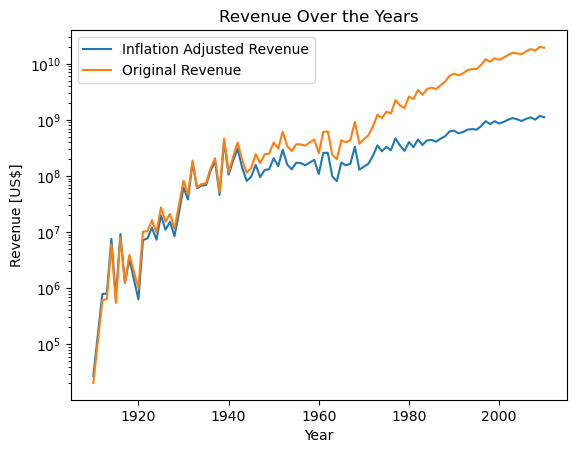

In [41]:
df_inflation = revenue_inflation_correction(movies_features_inc, inflation_raw)

# 'movies2_clean' ot whatever dataset is the right one...

In [42]:
df_inflation[df_inflation['year'] == 1915]

,name,year,alt_name,rating,votes,id_wiki,id_freebase,runtime,lang,countries,genres,revenue,winner,has_won,nominated,nbr_won,nbr_nomination,revenue_infl
292,Kindling,1915,Kindling,6.6,31.0,14626970,/m/03gr3s9,<NA>,"[Silent film, English Language]",[USA],"[Crime Fiction, Silent film, Drama, Indie, Bla...",66036.0,NaN,False,False,0,0,82545.0
1298,The Captive,1915,The Captive,6.5,128.0,14616918,/m/03gqqyf,50.0,"[Silent film, English Language]",[USA],"[Silent film, Romance Film, Drama, Indie, Blac...",56075.0,NaN,False,False,0,0,70093.75
1851,The Warrens of Virginia,1915,The Warrens of Virginia,5.9,23.0,14616220,/m/03gqq2m,<NA>,"[Silent film, English Language]",[USA],"[Silent film, Drama, Indie, Black-and-white]",85770.0,NaN,False,False,0,0,107212.5
2484,The Arab,1915,The Arab,5.1,49.0,14617357,/m/03gqrgm,50.0,"[Silent film, English Language]",[USA],"[Silent film, Adventure, Black-and-white, Indie]",68527.0,NaN,False,False,0,0,85658.75
5464,Chimmie Fadden Out West,1915,Chimmie Fadden Out West,4.9,23.0,14627259,/m/03gr45c,50.0,"[Silent film, English Language]",[USA],"[Silent film, Western, Indie, Black-and-white,...",72036.0,NaN,False,False,0,0,90045.0
6095,Alice in Wonderland,1915,Alice in Wonderland,6.2,516.0,23669602,/m/06zr25h,52.0,[English Language],[USA],"[Silent film, Black-and-white]",97477.0,NaN,False,False,0,0,121846.25
8989,The Girl of the Golden West,1915,The Girl of the Golden West,5.4,55.0,14614654,/m/03gqn62,50.0,"[Silent film, English Language]",[USA],"[Silent film, Western, Black-and-white, Indie]",102224.0,NaN,False,False,0,0,127780.0


The very high total revenue in the year 1915 catches the eye, but the data for it is valid. In 1915 the movie "The Birth of a Nation" was released, which is a movie that was extremely succesful and had a box office revenue of about [50-100 Mio US$ (Wikipedia)](https://en.wikipedia.org/wiki/The_Birth_of_a_Nation). 

### Normalization for counterbalancing natural growth of movie industry

The steady increase in total revenue over time can be explained partly by the ever increasing number of movies released per year. One should however also consider the steady growth of the movie industry, which allows a movie to make much more revenue today (with an international distribution of the movies) as opposed to earlier in time. This effect should be taken into consideration, which is why we perform a regression analysis and normalize the data accordingly:

In [43]:
df_inflation['revenue_part'] = df_inflation.groupby('year')['revenue'].transform(lambda x: x / x.sum())
display(df_inflation.sample(5))
display(df_inflation.shape)
display(df_inflation.info())


,name,year,alt_name,rating,votes,id_wiki,id_freebase,runtime,lang,countries,genres,revenue,winner,has_won,nominated,nbr_won,nbr_nomination,revenue_infl,revenue_part
8424,Beetlejuice,1988,Beetlejuice,7.5,295228.0,293524,/m/01qxc7,92.0,[English Language],[USA],"[Heaven-Can-Wait Fantasies, Horror, Fantasy, H...",86531600.5,[True],True,True,1,1,9215292.917998,0.018092
6444,Perri,1957,Perri,6.8,550.0,15304343,/m/03m468n,75.0,[English Language],[USA],"[Family Film, Documentary]",1750000.0,[False],False,True,0,1,784753.363229,0.005052
2789,Up the Creek,1984,Up the Creek,5.6,3300.0,2058406,/m/06j52r,95.0,[English Language],[USA],"[Action/Adventure, Action, Comedy, Adventure, ...",11708269.0,NaN,False,False,0,0,1419184.121212,0.0033
254,Prizzi's Honor,1985,Prizzi's Honor,6.7,24561.0,113454,/m/0sxlb,130.0,[English Language],[USA],"[Romantic comedy, Crime Fiction, Crime Comedy,...",26678767.0,"[False, False, True, False, False, False, Fals...",True,True,1,8,3123977.400468,0.007122
3490,The Kid Stays in the Picture,2002,The Kid Stays in the Picture,7.3,7449.0,3816108,/m/0b1f9j,92.0,[English Language],[USA],"[History, Biography, Film & Television History...",1434436.0,NaN,False,False,0,0,100450.70028,0.0001


(9427, 19)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9427 entries, 0 to 9426
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            9427 non-null   object 
 1   year            9427 non-null   Int64  
 2   alt_name        9427 non-null   object 
 3   rating          9427 non-null   float64
 4   votes           9427 non-null   float64
 5   id_wiki         9427 non-null   int64  
 6   id_freebase     9427 non-null   object 
 7   runtime         9326 non-null   object 
 8   lang            9427 non-null   object 
 9   countries       9427 non-null   object 
 10  genres          9427 non-null   object 
 11  revenue         9427 non-null   object 
 12  winner          1388 non-null   object 
 13  has_won         9427 non-null   bool   
 14  nominated       9427 non-null   bool   
 15  nbr_won         9427 non-null   int64  
 16  nbr_nomination  9427 non-null   int64  
 17  revenue_infl    9427 non-null   o

None

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.505
Model:                            OLS   Adj. R-squared (uncentered):              0.500
Method:                 Least Squares   F-statistic:                              100.1
Date:                Wed, 20 Dec 2023   Prob (F-statistic):                    1.17e-16
Time:                        10:29:00   Log-Likelihood:                         -2081.4
No. Observations:                  99   AIC:                                      4165.
Df Residuals:                      98   BIC:                                      4167.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

,name,year,alt_name,rating,votes,id_wiki,id_freebase,runtime,lang,countries,genres,revenue,winner,has_won,nominated,nbr_won,nbr_nomination,revenue_infl,revenue_part,revenue_norm
6389,"What's Up, Tiger Lily?",1966,"What's Up, Tiger Lily?",5.9,9597.0,1620938,/m/05hb3b,80.0,"[Japanese Language, English Language]","[USA, Japan]","[Parody, Absurdism, Japanese Movies, Comedy, Spy]",7306.0,NaN,False,False,0,0,2842.801556,0.000018,2669.408492
2572,Deuce Bigalow European Gigolo,2005,Deuce Bigalow European Gigolo,4.7,49000.0,2338993,/m/074w86,83.0,"[Dutch Language, English Language]",[USA],"[Gross out, Sex comedy, Gross-out film, Comedy...",45109561.0,NaN,False,False,0,0,2910294.258065,0.00305,2861493.770418
2429,High Spirits,1988,High Spirits,5.7,9650.0,4151108,/m/0blvtr,98.0,[English Language],"[USA, Ireland, United Kingdom]","[Horror, Fantasy Comedy, Fantasy, Comedy, Haun...",9687540.5,NaN,False,False,0,0,1031686.954207,0.002025,1005074.540344
2419,Passage to Zarahemla,2007,Passage to Zarahemla,5.1,299.0,9176509,/m/027_88n,107.0,[English Language],[USA],"[Action/Adventure, Drama, Adventure]",292990.0,NaN,False,False,0,0,17800.121507,0.000016,17538.301782
6534,Pursued,1947,Pursued,7.2,3300.0,1336467,/m/04tr4r,105.0,[English Language],[USA],"[Thriller, Psychological thriller, Black-and-w...",8720000.0,NaN,False,False,0,0,4926553.672316,0.051769,4603896.694128


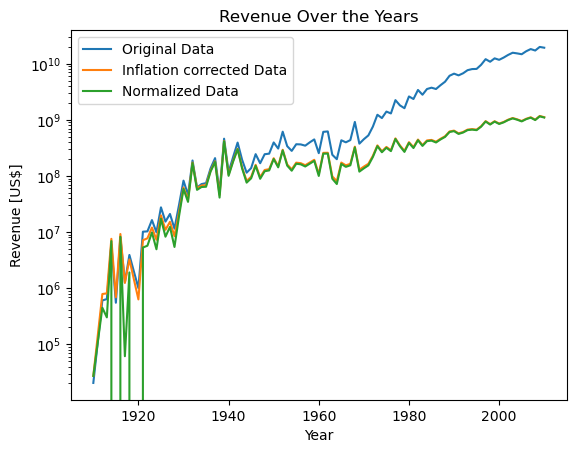

,name,year,alt_name,rating,votes,id_wiki,id_freebase,runtime,lang,countries,genres,has_won,nominated,nbr_won,nbr_nomination,revenue_part,revenue_norm
1573,Wing Commander,1999,Wing Commander,4.3,16840.0,707151,/m/034g6c,105.0,[English Language],"[USA, Luxembourg]","[Science Fiction, Adventure]",False,False,0,0,0.00109,1013268.343843
877,Running Scared,2006,Running Scared,7.3,100313.0,3635829,/m/09rcwd,121.0,"[Russian Language, English Language]","[USA, Germany]","[Thriller, Gangster Film, Action/Adventure, Dr...",False,False,0,0,0.000611,628614.220702
5124,Dragonball Evolution,2009,Dragonball Evolution,2.6,74182.0,14241872,/m/03gqjng,85.0,"[Hindi Language, Japanese Language, English La...","[USA, Hong Kong, United Kingdom]","[Science Fiction, Adventure, Doomsday film, Su...",False,False,0,0,0.001756,2029987.978759
3634,The Story of Us,1999,The Story of Us,6.0,22000.0,4743308,/m/0ck_0f,95.0,"[Italian Language, English Language]",[USA],"[Romantic comedy, Comedy-drama, Marriage Drama...",False,False,0,0,0.004715,4384682.736274
2606,Sybil,2007,Sybil,6.9,1636.0,11689743,/m/02rp1jq,89.0,[English Language],[USA],"[Drama, Television movie]",False,False,0,0,0.000177,194085.711033


(9427, 17)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9427 entries, 0 to 9426
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            9427 non-null   object 
 1   year            9427 non-null   Int64  
 2   alt_name        9427 non-null   object 
 3   rating          9427 non-null   float64
 4   votes           9427 non-null   float64
 5   id_wiki         9427 non-null   int64  
 6   id_freebase     9427 non-null   object 
 7   runtime         9326 non-null   object 
 8   lang            9427 non-null   object 
 9   countries       9427 non-null   object 
 10  genres          9427 non-null   object 
 11  has_won         9427 non-null   bool   
 12  nominated       9427 non-null   bool   
 13  nbr_won         9427 non-null   int64  
 14  nbr_nomination  9427 non-null   int64  
 15  revenue_part    9427 non-null   object 
 16  revenue_norm    9427 non-null   object 
dtypes: Int64(1), bool(2), float64(2),

None

In [44]:
movies_features = df_inflation.copy(deep=True)
movies_features = revenue_normalisation(df_inflation).drop(columns=['winner', 'revenue_infl', 'revenue'])

display(movies_features.sample(5))
display(movies_features.shape)
display(movies_features.info())


### b) Reviews

### c) Awards

### d) Plot similarity

In [45]:
movies.reset_index()

,index,id_wiki,id_freebase,name,year,revenue,runtime,lang,countries,genres
0,0,975900,/m/03vyhn,Ghosts of Mars,2001,14010832.0,98.0,[English Language],[USA],"[Thriller, Science Fiction, Horror, Adventure,..."
1,1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000,NaN,95.0,[English Language],[USA],"[Mystery, Biographical film, Drama, Crime Drama]"
2,5,13696889,/m/03cfc81,The Gangsters,1913,NaN,35.0,"[Silent film, English Language]",[USA],"[Short Film, Silent film, Indie, Black-and-whi..."
3,7,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938,3600000.0,106.0,[English Language],[USA],"[Musical, Comedy, Black-and-white]"
4,10,175026,/m/017n1p,Sarah and Son,1930,NaN,86.0,[English Language],[USA],"[Drama, Black-and-white]"
...,...,...,...,...,...,...,...,...,...,...
28816,74810,7761830,/m/0kvgqb,Spaced Invaders,1990,15369573.0,100.0,[English Language],[USA],"[Alien Film, Science Fiction, Family Film, Com..."
28817,74811,34474142,/m/0cpy07r,Frontier Fury,1943,NaN,55.0,[English Language],[USA],[Western]
28818,74815,1918494,/m/0660qx,State and Main,2000,6944471.0,106.0,"[Italian Language, English Language]","[France, USA]","[Parody, Americana, Comedy]"
28819,74817,24209227,/m/07k5mlk,"The Time, the Place and the Girl",1946,NaN,105.0,[English Language],[USA],"[Comedy film, Romance Film, Musical]"


In [46]:
MOVIES_PLOT = MOVIES_FOLDER + "plot_summaries.txt"
df_plot = pd.read_csv(MOVIES_PLOT, sep='\t', names=['id_wiki', 'plot'])

merged_df = df_plot.merge(movies, on='id_wiki')
merged_df.columns
corresp_table=merged_df.drop(columns=[ 'plot', 'id_freebase', 'name', 'year', 'revenue', 'runtime',
       'lang', 'countries', 'genres'])
corresp_table.head()


,id_wiki
0,2231378
1,595909
2,5272176
3,1952976
4,24225279


c:\Users\paulr\anaconda3\envs\ada\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\paulr\anaconda3\envs\ada\lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 't

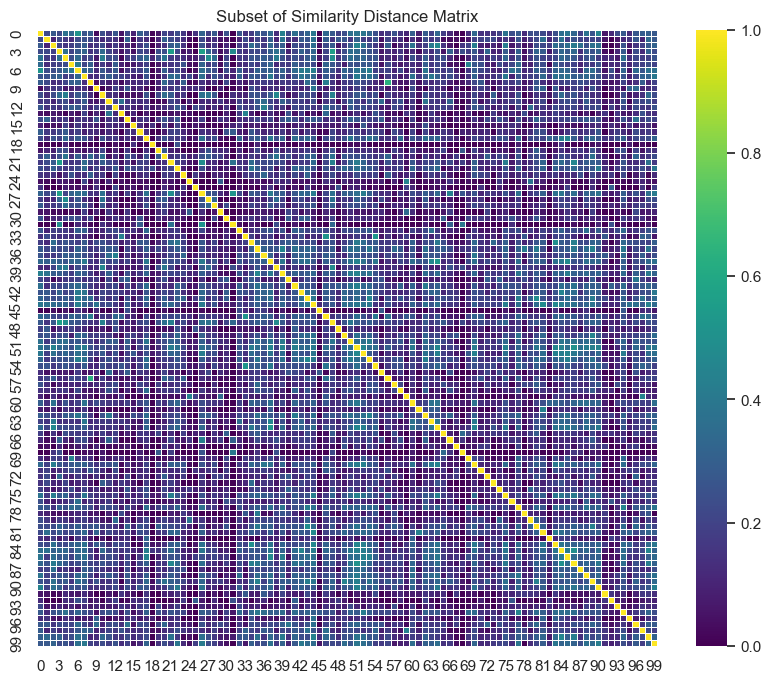

In [47]:
similarity_matrix = plot_similarity_heatmap(merged_df, 'plot')

In [48]:

# Example to find most similar movie
given_movie_index = 1665  # Replace with the index of the movie you're interested in
max_indices = np.argpartition(similarity_matrix[given_movie_index], -10)[-10:]
given_movie_name = merged_df.iloc[given_movie_index]['name']
most_similar_movie_names = merged_df.iloc[max_indices[9]]['name']

print("Given Movie Name:", given_movie_name)
print("Most Similar Movie Names:", most_similar_movie_names)
print(max_indices)

Given Movie Name: Blood of Dracula's Castle
Most Similar Movie Names: Kid Auto Races at Venice
[10055 14360   268 14623  3737 10079 14981  1665 10742  7923]


In [59]:
NAME_OF_THE_MOVIE= 'Resident'
display( merged_df[merged_df['name'].str.contains(NAME_OF_THE_MOVIE, case=False, na=False)])


,id_wiki,plot,id_freebase,name,year,revenue,runtime,lang,countries,genres
194,3790121,The film chronicles the 2000 US Presidential E...,/m/0b04dj,Unprecedented: The 2000 Presidential Election,2002,NaN,50.0,[English Language],[USA],"[Indie, History, Law & Crime, Political cinema..."
1275,5649004,"Rufus Jones, an African American child, is ele...",/m/0dy4tq,Rufus Jones for President,1933,NaN,21.0,[English Language],[USA],"[Short Film, Musical, Comedy, Black-and-white]"
1629,28075586,The United States elects its first female Pres...,/m/0b_vnkz,Kisses for My President,1964,NaN,113.0,"[English Language, Spanish Language]",[USA],[Comedy film]
4244,258732,Immensely popular Democratic President Andrew ...,/m/01m3wp,The American President,1995,107879496.0,129.0,[English Language],[USA],"[Romantic comedy, Drama, Comedy, Political cin..."
4444,2845380,Duncan Fletcher is an average teenager in sea...,/m/086fc_,My Date with the President's Daughter,1998,NaN,93.0,[English Language],[USA],"[Romantic comedy, Family Film, Comedy, Teen]"
6427,24928922,"{{copyedit}} Juliet Devereau , an emergency ro...",/m/09g91kh,The Resident,2010,NaN,91.0,[English Language],"[USA, United Kingdom]","[Thriller, Mystery, Drama]"
6933,3396829,"Dr. Sidney Schaefer , a psychiatrist, is chose...",/m/099dqv,The President's Analyst,1967,NaN,103.0,"[Standard Mandarin, Russian Language, English ...",[USA],"[Parody, Thriller, Science Fiction, Political ..."
9385,18459833,A committee of independent U.S. political part...,/m/04f0cl5,Linda Lovelace for President,1975,NaN,95.0,[English Language],[USA],"[Parody, Mockumentary, Comedy, Social issues]"
9948,10394188,It tells the fictional story of American presi...,/m/02qbhfw,The Phantom President,1932,NaN,78.0,[English Language],[USA],"[Musical, Political satire, Comedy, Black-and-..."
10150,7210380,Betty runs for the office of President against...,/m/025w6wn,Betty Boop for President,1932,NaN,NaN,[English Language],[USA],"[Satire, Comedy]"


In [50]:
scifi_before_star_wars = merged_df[(merged_df['genres'].apply(lambda genre : 'Science Fiction' in genre)) & (merged_df['year'] < 1977)].index
scifi_after_star_wars = merged_df[(merged_df['genres'].apply(lambda genre : 'Science Fiction' in genre)) & (merged_df['year'] > 1977)].index
comedy_df=merged_df[merged_df['genres'].apply(lambda genre : 'Science Fiction' in genre)].index

star_wars_movies = merged_df[merged_df['name'].str.contains('Star Wars', case=False, na=False)]

a=calculate_mean_similarity_1(similarity_matrix, 3769	, scifi_before_star_wars)
b=calculate_mean_similarity_1(similarity_matrix, 3769, scifi_after_star_wars)
print('Similarity means before Star Wars:{}'.format(a))
print('Similarity means after Star Wars:{}'.format(b))


Similarity means before Star Wars:0.17622116642391022
Similarity means after Star Wars:0.21030837821739862


In [51]:
import numpy as np
import pandas as pd

def find_most_influential_movie(similarity_matrix, genre, df):
    """
    Find the movie within a specific genre that has the most similarities with other movies in that genre.

    Parameters:
    - similarity_matrix (numpy.ndarray): Matrix containing pairwise similarities between movie plots.
    - genre (str): The genre for which to find the most influential movie.
    - df (pandas.DataFrame): DataFrame containing movie information, including genres.

    Returns:
    - str: The name of the most influential movie in the specified genre.
    """
    # Filter movies of the specified genre
    genre_movies = df[df['genres'].apply(lambda genres: genre in genres)]

    # Get the indices of movies of the specified genre
    genre_indices = genre_movies.index.tolist()

    # Initialize variables to store the most influential movie
    max_avg_similarity = 0.0
    most_influential_movie = None

    # Iterate through movies and compute average similarity to other movies in the genre
    for i in range(len(genre_indices)):
        avg_similarity_to_genre = np.mean(similarity_matrix[genre_indices[i], genre_indices])
        
        # Update most influential movie
        if avg_similarity_to_genre > max_avg_similarity:
            max_avg_similarity = avg_similarity_to_genre
            most_influential_movie = df.loc[genre_indices[i], 'name']

    return most_influential_movie

# Example usage:
# Assuming similarity_matrix is your pre-computed similarity matrix, and df is your DataFrame
# Replace 'Science Fiction' with the genre you are interested in
most_influential_movie = find_most_influential_movie(similarity_matrix, 'Crime Fiction', merged_df)

print(f"The most influential movie in Science Fiction is: {most_influential_movie}")


The most influential movie in Science Fiction is: I, the Jury


In [52]:
# Example usage:
# Assuming 'merged_df' is your DataFrame, 'similarity_matrix' is your pre-computed similarity matrix
movie_index = 4906  # Replace with the actual index of the film in the DataFrame
film_row = merged_df.iloc[movie_index]
genre=film_row['genres'][0]
mean_similarity_before, mean_similarity_after = calculate_mean_similarity_2(movie_index, merged_df, similarity_matrix, genre)

print(f"Mean Similarity 10 Years Before: {mean_similarity_before:.2f}")
print(f"Mean Similarity 10 Years After: {mean_similarity_after:.2f}")


Mean Similarity 10 Years Before: 0.18
Mean Similarity 10 Years After: 0.19


## 3) Method for identifying pivotal movies

### 3.1) TEST

### 3.2) Serious Buisness Machine learning

In [53]:
from helpers import *


In [54]:
# CREATION OF DF_CANDIDATES



min_elements = 3  # You can set the minimum number of elements for the if loop
result_df = process_candidates(candidates, min_elements,movies_features,merged_df,similarity_matrix)
display(result_df)

c:\Users\paulr\anaconda3\envs\ada\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\paulr\anaconda3\envs\ada\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\paulr\anaconda3\envs\ada\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\paulr\anaconda3\envs\ada\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\paulr\anaconda3\envs\ada\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\paulr\anaconda3\envs\ada\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar 

,id_wiki,name,year,alt_name,rating,votes,genres,nbr_won,nbr_nomination,revenue_norm,trend_number,trend_genre,year_from_trend,mean_similarity_before,mean_similarity_after
0,1716921,Amazon Women on the Moon,1987,Amazon Women on the Moon,6.2,11932.0,"[Parody, Cult, Science Fiction, Comedy, Absurd...",0,0,59116.397417,1,Absurdism,3,0.160908,0.187811
1,75222,Spaceballs,1987,Spaceballs,7.1,188893.0,"[Parody, Science Fiction, Adventure, Absurdism...",0,0,4106985.482572,1,Absurdism,3,0.244459,0.303527
2,390867,UHF,1989,UHF,6.9,28522.0,"[Parody, Media Satire, Indie, Absurdism, Satir...",0,0,612316.448354,1,Absurdism,1,0.260398,0.303014
3,4727,Batman,1966,Batman,6.5,32993.0,"[Parody, Superhero movie, Camp, Action/Adventu...",0,0,149890.611723,2,Action,1,0.201120,0.179416
4,1830725,The 300 Spartans,1962,The 300 Spartans,6.5,7171.0,"[Sword and Sandal, Adventure, History, Histori...",0,0,15412724.405037,2,Action,5,0.180424,0.173512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3110,3084973,Shock Waves,1977,Shock Waves,5.5,5434.0,"[Cult, Zombie Film, Horror]",0,0,10646.326926,385,Zombie Film,3,0.104084,0.103878
3111,11696301,Deathdream,1974,Deathdream,6.6,5284.0,"[Zombie Film, Creature Film, Horror, Slasher, ...",0,0,7679.233225,385,Zombie Film,6,0.249258,0.292689
3112,1802400,Phantasm,1979,Phantasm,6.6,36816.0,"[Cult, Zombie Film, Horror, Slasher, Supernatu...",0,0,1994926.835079,385,Zombie Film,1,0.160399,0.131133
3113,1033297,Resident Evil,2002,Resident Evil,6.6,269222.0,"[Thriller, Science Fiction, Horror, Adventure,...",0,0,6865491.244426,386,Zombie Film,0,NaN,NaN


In [56]:
merged_df[merged_df['id_wiki'==1033297]]

KeyError: False

In [ ]:
# FILTERING 

# Now we have the big candidates DataFrame we will Filter the non-interesting trends i.e. trends with less than 10 candidates
filtered_result_df = filter_candidates(result_df)
display(filtered_result_df)




There are 1703 different movies


,id_wiki,name,year,alt_name,rating,votes,genres,nbr_won,nbr_nomination,revenue_norm,trend_number,trend_genre,year_from_trend,mean_similarity_before,mean_similarity_after
0,1716921,Amazon Women on the Moon,1987,Amazon Women on the Moon,6.2,11932.0,"[Parody, Cult, Science Fiction, Comedy, Absurd...",0,0,59116.397417,1,Absurdism,3,0.160908,0.187811
1,75222,Spaceballs,1987,Spaceballs,7.1,188893.0,"[Parody, Science Fiction, Adventure, Absurdism...",0,0,4106985.482572,1,Absurdism,3,0.244459,0.303527
2,390867,UHF,1989,UHF,6.9,28522.0,"[Parody, Media Satire, Indie, Absurdism, Satir...",0,0,612316.448354,1,Absurdism,1,0.260398,0.303014
3,4727,Batman,1966,Batman,6.5,32993.0,"[Parody, Superhero movie, Camp, Action/Adventu...",0,0,149890.611723,2,Action,1,0.201120,0.179416
4,1830725,The 300 Spartans,1962,The 300 Spartans,6.5,7171.0,"[Sword and Sandal, Adventure, History, Histori...",0,0,15412724.405037,2,Action,5,0.180424,0.173512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3107,905906,Empire Records,1995,Empire Records,6.7,55408.0,"[Ensemble Film, Indie, Comedy-drama, Workplace...",0,0,24573.611877,382,Workplace Comedy,0,0.304628,0.303943
3109,65436,Dawn of the Dead,1978,Dawn of the Dead,7.8,119964.0,"[Horror, Indie, Doomsday film, Cult, Splatter ...",0,0,8944651.332116,385,Zombie Film,2,0.254907,0.259275
3110,3084973,Shock Waves,1977,Shock Waves,5.5,5434.0,"[Cult, Zombie Film, Horror]",0,0,10646.326926,385,Zombie Film,3,0.104084,0.103878
3111,11696301,Deathdream,1974,Deathdream,6.6,5284.0,"[Zombie Film, Creature Film, Horror, Slasher, ...",0,0,7679.233225,385,Zombie Film,6,0.249258,0.292689


In [ ]:
# STANDARDIZATION

# Standardization of the features: we standardize the feature for EACH TRENDS
re = filtered_result_df.copy()
features_to_standardize = ['rating', 'nbr_won','votes', 'nbr_nomination', 'revenue_norm', 'mean_similarity_before','mean_similarity_after']
result_df_standardized = standardize_features(re, features_to_standardize)
display(result_df_standardized)

There are 1703 different movies


,trend_number,level_1,id_wiki,name,year,alt_name,rating,votes,genres,nbr_won,nbr_nomination,revenue_norm,trend_genre,year_from_trend,mean_similarity_before,mean_similarity_after
0,1,0,1716921,Amazon Women on the Moon,1987,Amazon Women on the Moon,-1.382189,-0.808505,"[Parody, Cult, Science Fiction, Comedy, Absurd...",0.000000,0.000000,-0.855815,Absurdism,3,-1.398399,-1.414203
1,1,1,75222,Spaceballs,1987,Spaceballs,0.950255,1.409111,"[Parody, Science Fiction, Adventure, Absurdism...",0.000000,0.000000,1.402939,Absurdism,3,0.516549,0.711812
2,1,2,390867,UHF,1989,UHF,0.431934,-0.600605,"[Parody, Media Satire, Indie, Absurdism, Satir...",0.000000,0.000000,-0.547124,Absurdism,1,0.881850,0.702391
3,2,3,4727,Batman,1966,Batman,-0.062406,0.427354,"[Parody, Superhero movie, Camp, Action/Adventu...",-0.249653,-0.421505,-0.832579,Action,1,0.267357,-0.054074
4,2,4,1830725,The 300 Spartans,1962,The 300 Spartans,-0.062406,-0.229093,"[Sword and Sandal, Adventure, History, Histori...",-0.249653,-0.421505,1.954462,Action,5,-0.113705,-0.166399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2597,382,3107,905906,Empire Records,1995,Empire Records,-1.297771,0.082912,"[Ensemble Film, Indie, Comedy-drama, Workplace...",0.000000,0.000000,-0.741435,Workplace Comedy,0,1.349471,1.226194
2598,385,3109,65436,Dawn of the Dead,1978,Dawn of the Dead,1.444275,1.665789,"[Horror, Indie, Doomsday film, Cult, Splatter ...",0.000000,0.000000,1.689339,Zombie Film,2,0.993219,0.774945
2599,385,3110,3084973,Shock Waves,1977,Shock Waves,-1.382816,-0.777341,"[Cult, Zombie Film, Horror]",0.000000,0.000000,-0.742915,Zombie Film,3,-1.394227,-1.150875
2600,385,3111,11696301,Deathdream,1974,Deathdream,-0.030729,-0.780541,"[Zombie Film, Creature Film, Horror, Slasher, ...",0.000000,0.000000,-0.743723,Zombie Film,6,0.903797,1.189036


In [ ]:
# PIVOTAL MOVIES
STAR_WARS_IV = result_df_standardized[(result_df_standardized['id_wiki'] == 52549) & (result_df_standardized['trend_number'] == 320)].head(1)
THE_KARATE_KID = result_df_standardized[(result_df_standardized['id_wiki'] == 91133) & (result_df_standardized['trend_number'] == 247)].head(1)
TRANSFORMERS_MOVIE = result_df_standardized[(result_df_standardized['id_wiki'] == 76515) & (result_df_standardized['trend_number'] == 236)].head(1)
TOY_STORY = result_df_standardized[(result_df_standardized['id_wiki'] == 53085) & (result_df_standardized['trend_number'] == 102)].head(1)
JERRY_MAGUIRE = result_df_standardized[result_df_standardized['id_wiki'] == 142435].head(1)
WEREWOLF_IN_LONDON = result_df_standardized[result_df_standardized['id_wiki'] == 471370].head(1)
THE_LION_KING = result_df_standardized[(result_df_standardized['id_wiki'] == 88678) & (result_df_standardized['trend_number'] == 31)].head(1)
ROSEMARYS_BABY = result_df_standardized[(result_df_standardized['id_wiki'] == 9830229) & (result_df_standardized['trend_number'] == 225)].head(1)
ROCKY_HORROR_PICTURE_SHOW = result_df_standardized[(result_df_standardized['id_wiki'] == 25491) & (result_df_standardized['trend_number'] == 226)].head(1)
BEVERLY_HILLS_COP = result_df_standardized[(result_df_standardized['id_wiki'] == 680398) & (result_df_standardized['trend_number'] == 66)].head(1)

PIVOTAL=pd.concat([STAR_WARS_IV,THE_KARATE_KID,TRANSFORMERS_MOVIE,TOY_STORY,JERRY_MAGUIRE,WEREWOLF_IN_LONDON,THE_LION_KING,ROSEMARYS_BABY,ROCKY_HORROR_PICTURE_SHOW,BEVERLY_HILLS_COP])

# NON-PIVOTAL MOVIES
SCI_FI=  result_df_standardized[(result_df_standardized['id_wiki'] != 52549) & (result_df_standardized['trend_number'] == 320)]
CLOSE_ENCOUNTERS = result_df_standardized[(result_df_standardized['id_wiki'] == 146236) & (result_df_standardized['trend_number'] == 320)].head(1)
LORD_JIM = result_df_standardized[(result_df_standardized['id_wiki'] == 4693134) & (result_df_standardized['trend_number'] == 2)].head(1)
KARATE_KID_NON_PIVOTAL = result_df_standardized[(result_df_standardized['id_wiki'] == 91133) & (result_df_standardized['trend_number'] == 236)].head(1)
STAR_WARS_IV_NON_PIVOTAL = result_df_standardized[(result_df_standardized['id_wiki'] == 52549) & (result_df_standardized['trend_number'] == 100)].head(1)
THE_LION_KING_NON_PIVOTAL = result_df_standardized[(result_df_standardized['id_wiki'] == 88678) & (result_df_standardized['trend_number'] == 101)].head(1)
BEVERLY_HILLS_COP_NON_PIVOTAL = result_df_standardized[(result_df_standardized['id_wiki'] == 680398) & (result_df_standardized['trend_number'] == 368)].head(1)
THE_OCTAGON = result_df_standardized[(result_df_standardized['id_wiki'] == 9782726) & (result_df_standardized['trend_number'] == 247)].head(1)
RETURN_OF_THE_KING = result_df_standardized[(result_df_standardized['id_wiki'] == 516463) & (result_df_standardized['trend_number'] == 236)].head(1)
THE_BIRDS = result_df_standardized[(result_df_standardized['id_wiki'] == 304428) & (result_df_standardized['trend_number'] == 225)].head(1)
NON_PIVOTAL=pd.concat( [SCI_FI,CLOSE_ENCOUNTERS,LORD_JIM,KARATE_KID_NON_PIVOTAL,STAR_WARS_IV_NON_PIVOTAL,THE_LION_KING_NON_PIVOTAL,BEVERLY_HILLS_COP_NON_PIVOTAL,THE_OCTAGON,RETURN_OF_THE_KING,THE_BIRDS])
# Concatenate all DataFrames
all_movies=pd.concat([PIVOTAL,NON_PIVOTAL])

# Extract relevant features for

# Extract relevant features for training
features_train = all_movies[['rating', 'nbr_won','votes', 'nbr_nomination', 'revenue_norm', 'mean_similarity_before','mean_similarity_after','year_from_trend']]

# Create the target variable y_train (1 for pivotal movies, 0 for non-pivotal movies)
y_train = [1] * 10 + [0] * 9 + [0] *len(SCI_FI)

# Display the concatenated DataFrame
display(features_train)

# Display y_train
print(y_train)


,rating,nbr_won,votes,nbr_nomination,revenue_norm,mean_similarity_before,mean_similarity_after,year_from_trend
1917,2.086679,6.615430,6.003067,4.751050,6.572556,0.888508,0.949559,0
1522,1.655585,0.000000,3.454229,2.828427,3.794764,-0.438284,0.199747,2
1479,0.711266,0.000000,-0.031474,-0.408248,-0.354274,0.861020,1.398797,0
659,1.176986,0.000000,2.143800,2.110579,1.150586,-0.597800,0.892086,5
2019,1.235912,7.000000,3.619305,5.899142,4.172270,0.994660,0.704479,1
...,...,...,...,...,...,...,...,...
622,1.985330,2.120757,3.048746,1.819914,5.800675,0.110065,0.407813,1
2447,1.311096,-0.147643,1.307000,0.688620,7.519331,1.386656,1.438893,3
1511,-1.075141,0.000000,-0.414748,-0.353553,0.404447,0.581738,1.217496,6
1482,-0.914485,0.000000,-0.510129,-0.408248,-0.534644,-0.858895,-0.834899,6


[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
# INFO FROM TRAINING

from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(solver='lbfgs')
logistic.fit(features_train,y_train)
# Print coefficients
print("Coefficients:", logistic.coef_)

# Print intercept
print("Intercept:", logistic.intercept_)

Coefficients: [[ 0.58038587  0.1301332   0.61292054  0.29796484 -0.04273978  0.08730066
   1.39826884 -0.0379788 ]]
Intercept: [-4.1156594]


In [ ]:
# PREDICTION FOR EVERY TRENDS

from sklearn.linear_model import LogisticRegression

# Assuming features_train and y_train are defined
# ...

grouped_by_trend = result_df_standardized.groupby('trend_number')
# Dictionary to store most likely pivotal movie for each group
most_likely_pivotal = {}

# Iterate over groups
for trend_number, group_df in grouped_by_trend:
    # Select features and labels for the group
    features_group = group_df[['rating', 'nbr_won','votes', 'nbr_nomination', 'revenue_norm', 'mean_similarity_before','mean_similarity_after','year_from_trend']]
    
    # Predict probabilities for being pivotal
    probabilities = logistic.predict_proba(features_group)[:, 1]
    
    # Identify the index with the highest probability
    most_likely_index = probabilities.argmax()
    
    # Get the details of the most likely pivotal movie
    most_likely_movie = group_df.iloc[most_likely_index]
    
    # Store the result in the dictionary
    most_likely_pivotal[trend_number] = most_likely_movie

# Display the most likely pivotal movie for each group
for trend_number, movie_info in most_likely_pivotal.items():
    print(f"Trend {candidates[int(trend_number)][0]} of year {candidates[int(trend_number)][2]}: Most Likely Pivotal Movie - {movie_info['name']}")



Trend Absurdism of year 1990: Most Likely Pivotal Movie - Spaceballs
Trend Action of year 1967: Most Likely Pivotal Movie - Lawrence of Arabia
Trend Action Thrillers of year 1987: Most Likely Pivotal Movie - First Blood
Trend Action/Adventure of year 1966: Most Likely Pivotal Movie - Lawrence of Arabia
Trend Animal Picture of year 1992: Most Likely Pivotal Movie - Harry and the Hendersons
Trend Animation of year 1997: Most Likely Pivotal Movie - The Lion King
Trend B-movie of year 1954: Most Likely Pivotal Movie - Them!
Trend Biographical film of year 1951: Most Likely Pivotal Movie - The Desert Fox The Story of Rommel
Trend Biographical film of year 1974: Most Likely Pivotal Movie - Patton
Trend Biography of year 1970: Most Likely Pivotal Movie - Patton
Trend Biography of year 1996: Most Likely Pivotal Movie - Schindler's List
Trend Biopic [feature] of year 1951: Most Likely Pivotal Movie - Jolson Sings Again
Trend Biopic [feature] of year 1973: Most Likely Pivotal Movie - Patton
Tren

In [66]:
!pip install networkx

   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.6 MB 1.1 MB/s eta 0:00:02
   ----- ---------------------------------- 0.2/1.6 MB 2.3 MB/s eta 0:00:01
   ---------------- ----------------------- 0.7/1.6 MB 4.6 MB/s eta 0:00:01
   -------------------------------- ------- 1.3/1.6 MB 7.1 MB/s eta 0:00:01
   ---------------------------------------- 1.6/1.6 MB 7.5 MB/s eta 0:00:00


In [74]:
NAME_OF_THE_MOVIE= 'Star Wars'
display( merged_df[merged_df['name'].str.contains(NAME_OF_THE_MOVIE, case=False, na=False)])
print(similarity_matrix[1642,3647])

,id_wiki,plot,id_freebase,name,year,revenue,runtime,lang,countries,genres
1642,53964,The film begins with an opening crawl explain...,/m/0f3m1,Star Wars Episode V: The Empire Strikes Back,1980,5.383751e+08,124.0,[English Language],[USA],"[Science Fiction, Adventure, Space opera, Fant..."
3429,50957,The Galactic Republic is in turmoil. Followin...,/m/0dfw0,Star Wars Episode II: Attack of the Clones,2002,6.493983e+08,142.0,[English Language],[USA],"[Science Fiction, Adventure, Space opera, Fant..."
3647,52549,The film begins with an opening crawl explain...,/m/0dtfn,Star Wars Episode IV: A New Hope,1977,7.753980e+08,122.0,[English Language],[USA],"[Science Fiction, Adventure, Fantasy, Coming o..."
8019,185264,"It is Life Day . Chewbacca, accompanied by Han...",/m/0199wf,The Star Wars Holiday Special,1978,NaN,97.0,[English Language],[USA],"[Science Fiction, Adventure, Holiday Film, Ani..."
10264,50793,The Galactic Republic is in a period of decli...,/m/0ddt_,Star Wars Episode I: The Phantom Menace,1999,1.027045e+09,136.0,[English Language],[USA],"[Science Fiction, Action, Fantasy, Adventure, ..."
10456,3336298,The special was hosted by C-3PO and R2-D2.{{c...,/m/096gqt,The Making of Star Wars,1977,NaN,50.0,[English Language],[USA],[Documentary]
11747,55447,"As the Clone Wars rage on, the Galactic Repub...",/m/0fdv3,Star Wars Episode III: Revenge of the Sith,2005,8.487548e+08,140.0,[English Language],[USA],"[Science Fiction, Action, Fantasy, Tragedy, Ad..."
13621,50744,Luke Skywalker initiates a plan to rescue Han...,/m/0ddjy,Star Wars Episode VI: Return of the Jedi,1983,4.751062e+08,135.0,[English Language],[USA],"[Science Fiction, Adventure, Space opera, Fant..."
14559,15726696,The Separatists control the majority of the hy...,/m/0cpllql,Star Wars: The Clone Wars,2008,6.828284e+07,90.0,[English Language],[USA],"[Thriller, Science Fiction, Adventure, Compute..."
15695,1861566,"Though a Star Wars fan as a child, life holds ...",/m/061wqh,Saving Star Wars,2004,NaN,117.0,[English Language],[USA],"[Indie, Comedy]"


0.5555548420606342


In [ ]:
def calculate_mean_similarity_1(similarity_matrix, chosen_movie_index, movie_indices):
   
    # Extract similarity values for the chosen movie and the set of movies
    similarities = similarity_matrix[chosen_movie_index, movie_indices]

    # Calculate the mean similarity
    mean_similarity = np.mean(similarities)

    return mean_similarity
import numpy as np
calculate_mean_similarity_1(similarity_matrix, chosen_movie_index, movie_indices)
# Example to find most similar movie


print("Given Movie Name:", given_movie_name)
print("Most Similar Movie Names:", most_similar_movie_names)
print(max_indices)

In [78]:
 merged_df[merged_df['id_wiki']==53964]['name']

1642    Star Wars Episode V: The Empire Strikes Back
Name: name, dtype: object

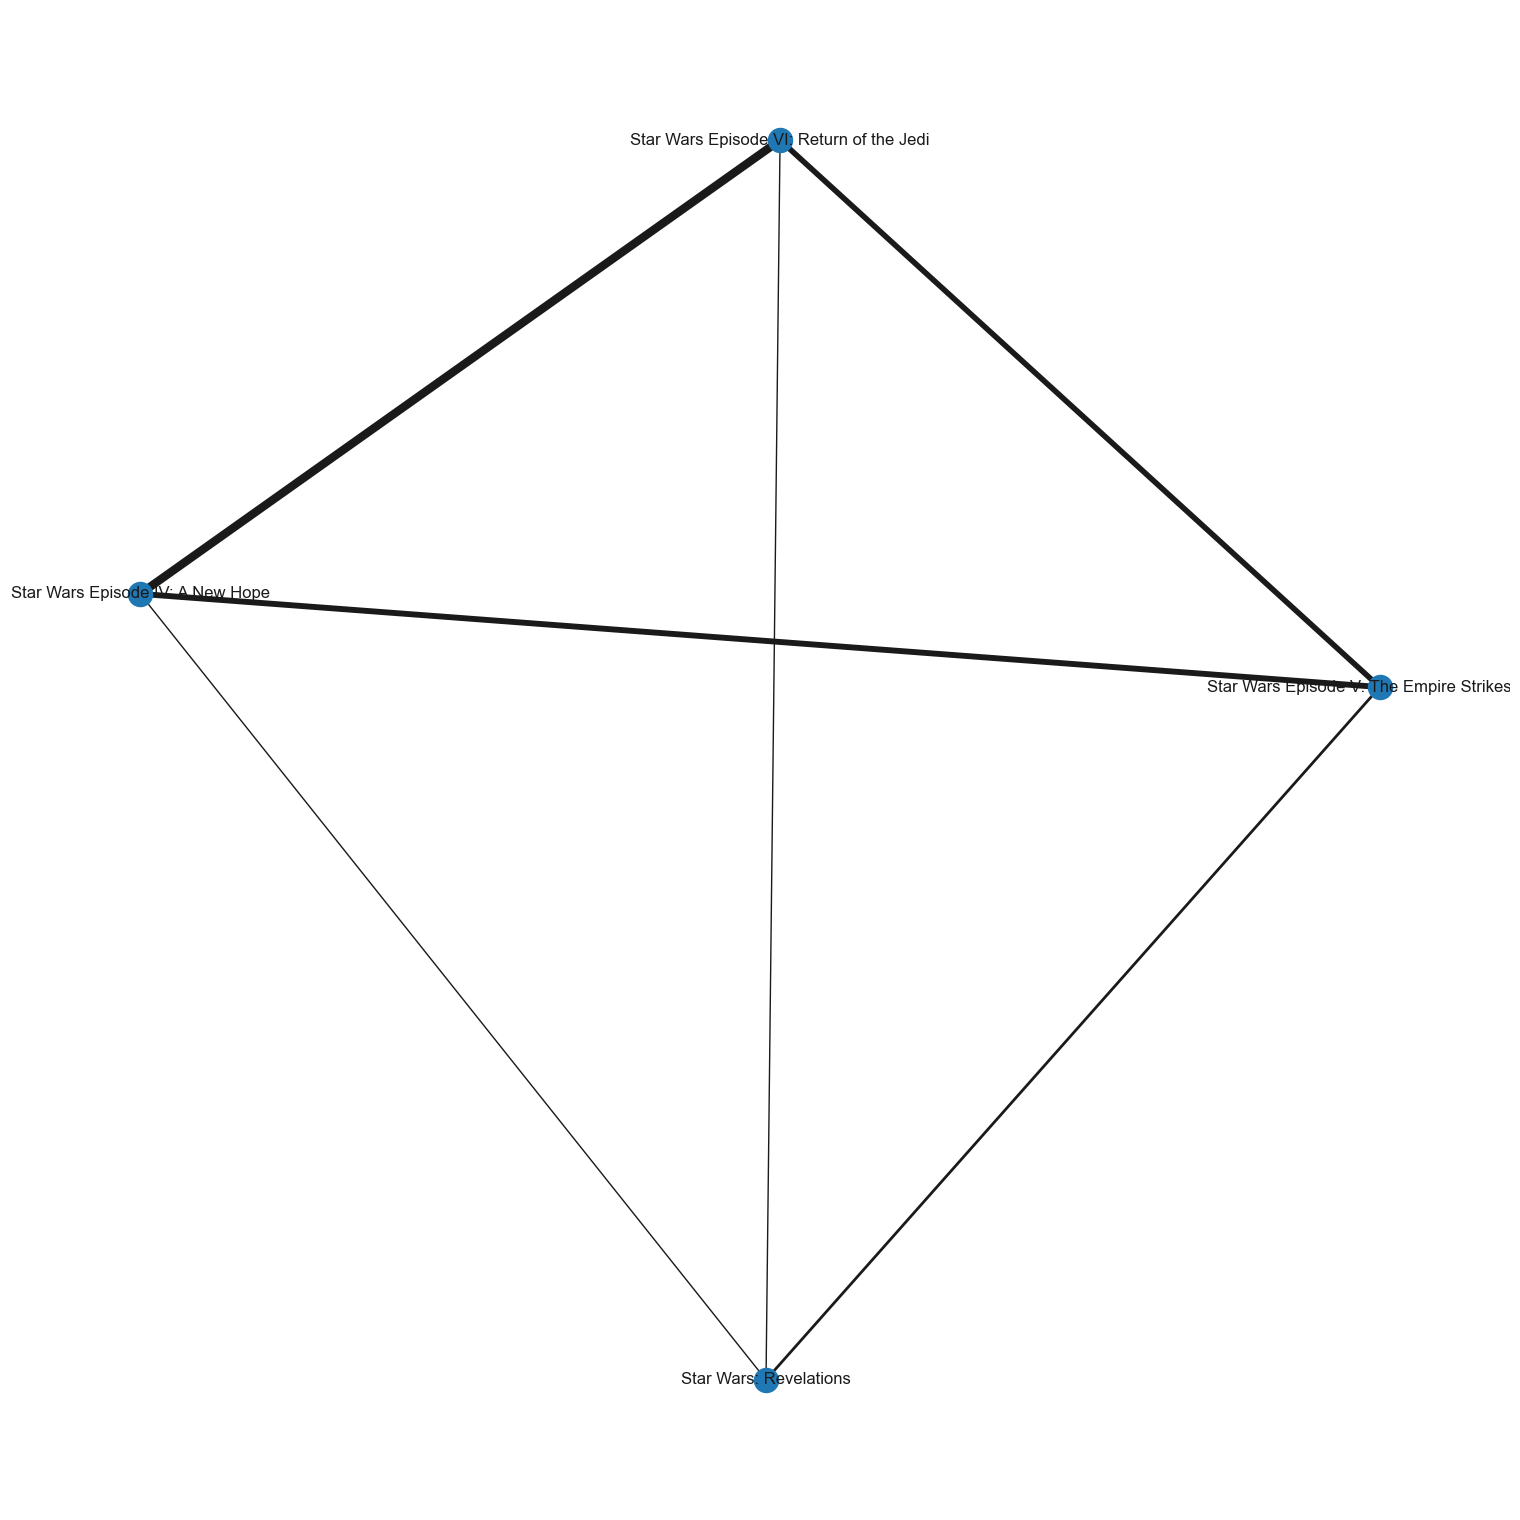

In [89]:
import networkx as nx
import matplotlib.pyplot as plt

def compute_plot_similarity(movie1_id, movie2_id):
    return similarity_matrix[movie1_id, movie2_id]

# Assuming id_wiki_list is a list of id_wiki values
id_wiki_list = [53964, 52549, 1823554,50744]  # Add more id_wiki values as needed

# Create a graph
G = nx.Graph()

# Iterate over pairs of id_wiki values
for i in range(len(id_wiki_list)):
    for j in range(i+1, len(id_wiki_list)):
        movie1_id = merged_df[merged_df['id_wiki'] == id_wiki_list[i]].index[0]
        movie2_id = merged_df[merged_df['id_wiki'] == id_wiki_list[j]].index[0]

        movie1_name = merged_df.loc[movie1_id, 'name']
        movie2_name = merged_df.loc[movie2_id, 'name']

        # Assuming compute_plot_similarity returns a single similarity score
        similarity_score = compute_plot_similarity(movie1_id, movie2_id)

        # Add nodes
        G.add_node(movie1_id, label=movie1_name)
        G.add_node(movie2_id, label=movie2_name)

        # Add edge with weight
        G.add_edge(movie1_id, movie2_id, weight=similarity_score)

# Draw the network with thicker edges for higher similarity scores
pos = nx.spring_layout(G)  # You can use other layout algorithms as well

# Extract edge weights
edge_weights = [G[u][v]['weight'] for u, v in G.edges()]

# Normalize edge weights to use for scaling edge thickness
max_weight = max(edge_weights)
min_weight = min(edge_weights)
scaled_weights = [5 * (weight - min_weight) / (max_weight - min_weight) + 1 for weight in edge_weights]

# Set a larger plot size
plt.figure(figsize=(15, 15))

# Draw the network with edge thickness proportional to similarity score
nx.draw(G, pos, with_labels=True, labels=nx.get_node_attributes(G, 'label'), width=scaled_weights)

# Save the figure with tight layout
plt.savefig('network_plot.png', bbox_inches='tight')

plt.show()

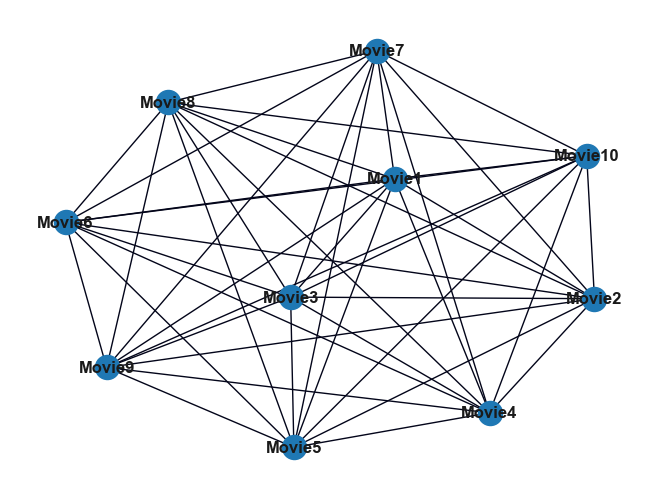

In [68]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Assuming you have a DataFrame with columns 'movie' and 'plot'
# Replace this with your actual DataFrame
data = {'movie': ['Star Wars Episode IV: A New Hope', 'Star Wars Episode V: The Empire Strikes Back', 'Star Wars Episode VI: Return of the Jedi'],
        'plot': ['Plot 1', 'Plot 2', 'Plot 3', 'Plot 4', 'Plot 5', 'Plot 6', 'Plot 7', 'Plot 8', 'Plot 9', 'Plot 10']}
df = pd.DataFrame(data)

# Assuming you have a function that computes plot similarity


# Create a graph
G = nx.Graph()

# Add nodes (movies) to the graph
G.add_nodes_from(df['movie'])

# Add edges with thickness representing plot similarity
for i in range(len(df)):
    for j in range(i + 1, len(df)):
        movie1 = merged_df[merged_df['id_wiki']==53964]['name']
        movie2 = merged_df[merged_df['id_wiki']==52549]['name']
        similarity_score = compute_plot_similarity(merged_df[merged_df['id_wiki']==52549].index, merged_df[merged_df['id_wiki']==52549].index)
        G.add_edge(movie1, movie2, weight=similarity_score)

# Extract edge weights
edge_weights = [G[u][v]['weight'] for u, v in G.edges()]

# Draw the graph
pos = nx.spring_layout(G)  # You can use other layout algorithms
nx.draw(G, pos, with_labels=True, font_weight='bold', width=edge_weights, edge_color=edge_weights, cmap=plt.cm.Blues)

# Display the plot
plt.show()


### b) (TO COMPLETE)

## 4) Analysis of the results 

We finally got the set of pivotals movies but we need to do an assessment of these results. 

### a) Convergence of the methods

### b) Correlation between pivotal movies

### c) How to make a pivotal movie ?